# Medical Cost Personal Dataset 

## Task

**The Requirements for this assessment:**

- based on the given dataset, identify stakeholders/audiences who could benefit from your study. Setup your goals together with relevant research questions and choose appropriate machine learning methods to achieve your goal. 

- Deliver your findings to your stakeholders/ audiences with critical insights.


**For each dataset:** 

- follow machine learning pipeline, after EDA and Preprocessing, select, train,apply, evaluate and present at least two models using different machine learning techniques.

- Describe and justify the selection of any appropriate hyper-parameters for each model. Compare the performances of the models. Along with the code cells (preferably with comments), you should use the appropriate markdown cells in the notebook to describe and justify your work.

- Novelty: Explore and innovate new method(s) that cannot be found in literature.

Based on your explorations across the three <span style="color: red; font-weight: bold;font-size: 12pt; text-decoration: underline"> ??</span> projects, reflect on the insights gained throughout
your learning journey. 

Consider how each dataset and the comparison of the three challenged
your understanding and forced you to think critically about data analysis, feature extraction, and
model performance. 

What new skills or concepts did you master that you previously found difficult
or confusing? 

Reflect on how this learning experience has deepened your knowledge, not just
technically, but also in terms of how you approach problem-solving. Think about how this process
has influenced your behaviour, perhaps making you more detail-oriented, patient, or the balance
between exploration and exploitation.

## What are the aims of this?

**The Requirements for this assessment:** 

    based on the given dataset, identify stakeholders/audiences who could benefit from your study. Setup your goals together with relevant research questions and choose appropriate machine learning methods to achieve your goal. Deliver your findings to your stakeholders/ audiences with critical insights.

- Predicting the charges that a patient may be expected to pay based upon 6 factors
    - Sex
    - Age
    - BMI
    - Children
    - Smoker
    - Region


### For each dataset

- Follow machine learning pipeline
    - EDA
    - Preprocessing
    - Select
    - Train (2 models)
    - Apply 
    - Evaluate
    - Present 

- Describe and justify the selection of any appropriate hyper-parameters for each model
- Compare the performance of both models
- Explore and innovate new methods that cannot be found in literature


## Stakeholders
- An insurance company that is creating a dynamic price plan that gives an accurate charge, 

    depending on certain factors that are asertained during the application

## Goals
- To be able to give certain factors and get a price based on these

## Research Questions
- What is the biggest impact on charge out of the variables given and why?

- *Is there a difference between bmi when it comes to men and women?*

BMI categories are the same for both men and women:
- Underweight: BMI < 18.5
- Normal weight: BMI 18.5 - 24.9
- Overweight: BMI 25 - 29.9
- Obesity: BMI 30 and above

Is there a way to encode these based on these categories?

## Imports


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display as ipd
import seaborn as sns

%matplotlib inline
import plotly.express as px
from rich import pretty, print
import ipywidgets as widgets
from ipywidgets import interact
import missingno as msno
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import joblib
import pandas as pd
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
import optuna
from sklearn.model_selection import cross_val_score


pretty.install()

In [2]:
colours = sns.color_palette("Set3")

## Load the dataset

In [3]:
data_filepath = "./Data/insurance-adapted.csv"
dataframe = pd.read_csv(data_filepath)
dataframe.head(6)

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520
5,NaN,female,25.740,0,no,southeast,3756.62160


In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1318 non-null   float64
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


/var/folders/xh/fvvnghrs13n5sqcsmprbn_c80000gn/T/ipykernel_29785/4074888093.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=dataframe, x="charges", palette=colours, bins=30, kde=True)


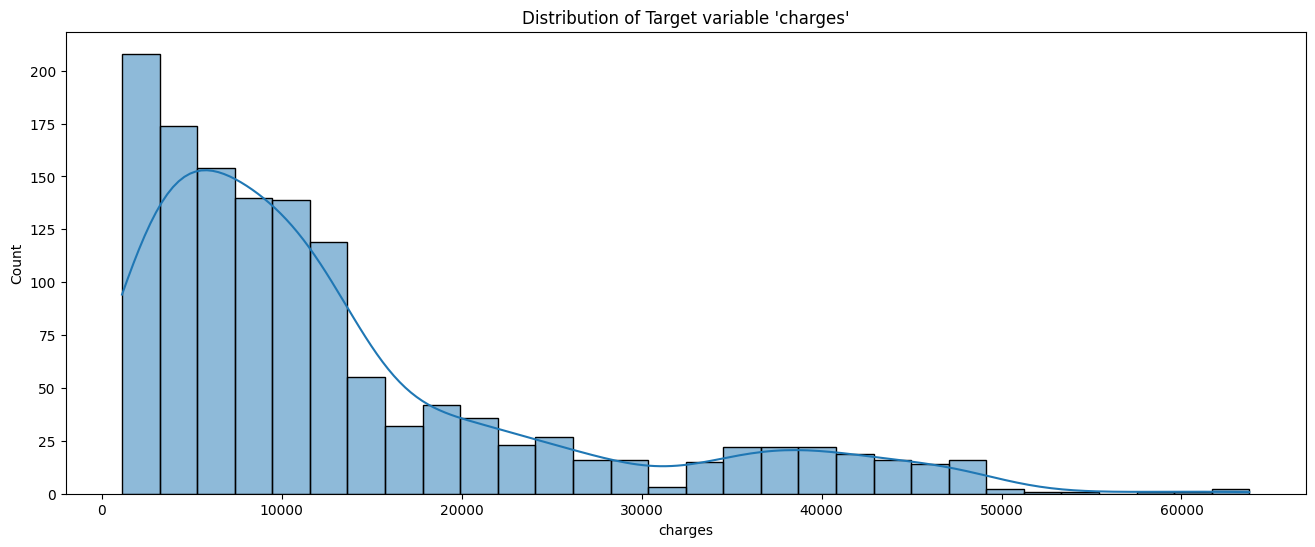

In [5]:
plt.figure(figsize=(16, 6))
sns.histplot(data=dataframe, x="charges", palette=colours, bins=30, kde=True)
plt.title("Distribution of Target variable 'charges'")
plt.show()

In [6]:
null_vals = dataframe.isnull().sum()
print(null_vals)

age         20
sex          0
bmi          0
children     0
smoker       0
region       0
charges      0
dtype: int64

In [7]:
na_vals = dataframe.isna().sum()
print(na_vals)

age         20
sex          0
bmi          0
children     0
smoker       0
region       0
charges      0
dtype: int64

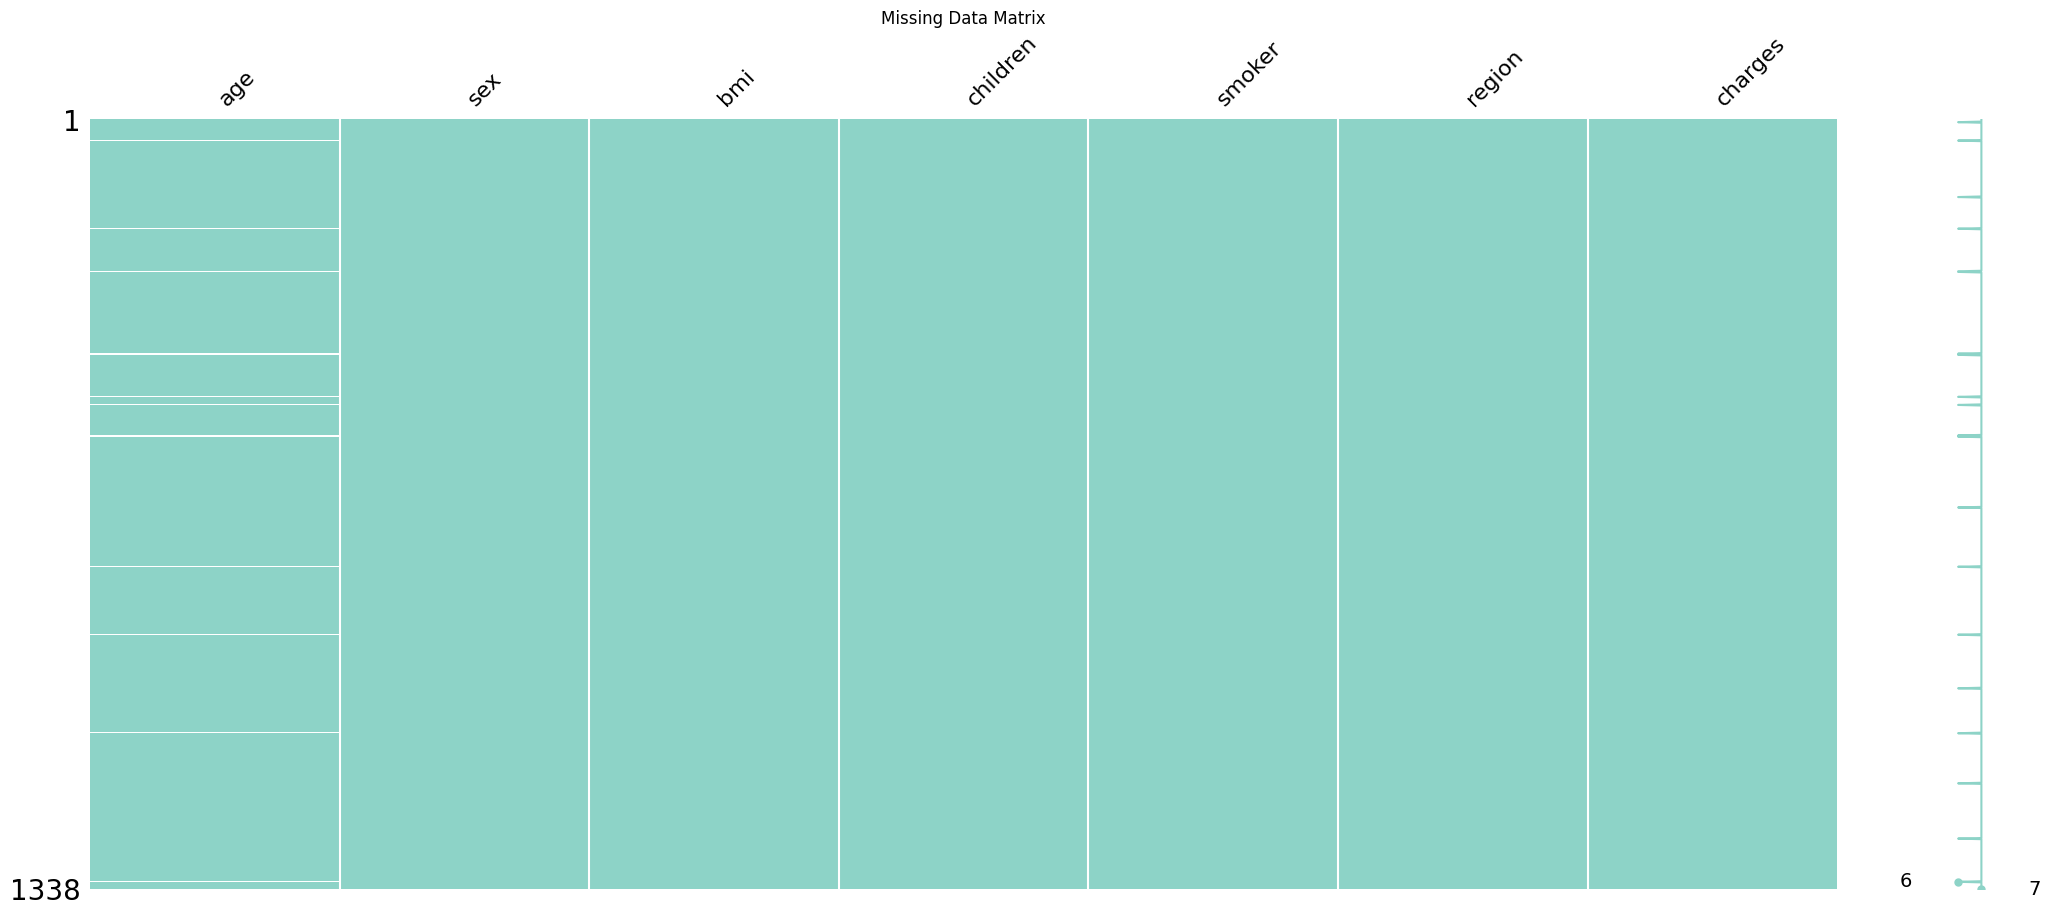

In [ ]:
msno.matrix(dataframe, color=colours[0])
plt.title("Missing Data Matrix")
plt.axis()
plt.show()

## Missing data:

- 20 values missing in the age feature, how are we going to handle this?

In [9]:
dataframe.describe()

,age,bmi,children,charges
count,1318.000000,1338.000000,1338.000000,1338.000000
mean,39.216237,30.663397,1.094918,13270.422265
std,14.083151,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Distribution of numeric features

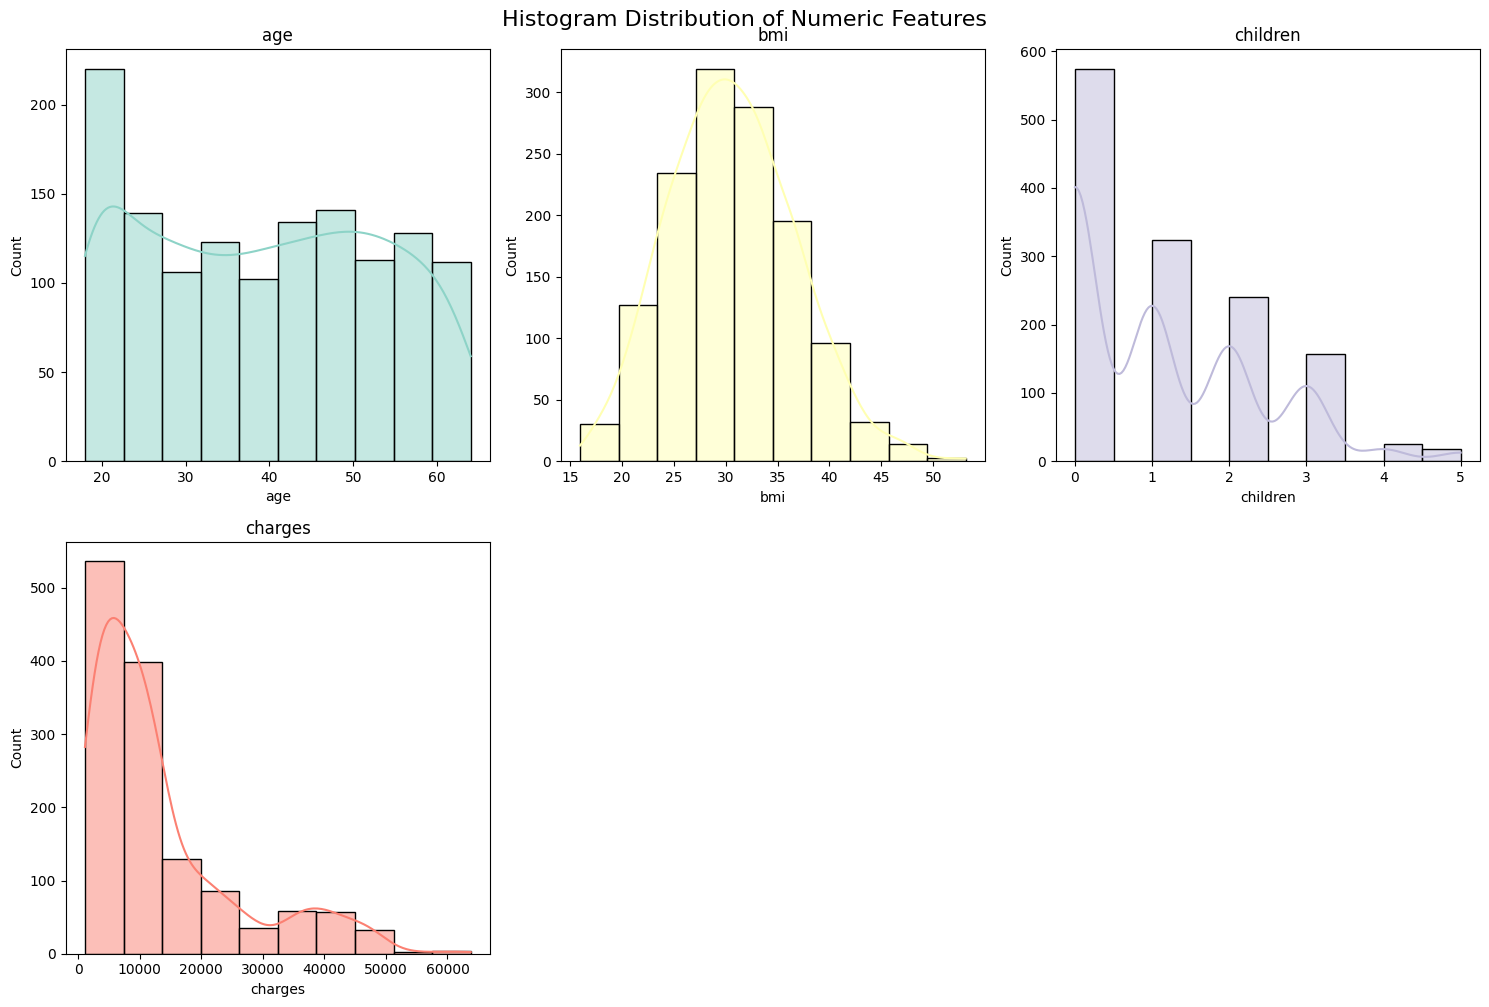

In [10]:
numeric_cols = dataframe.select_dtypes(include="number").columns

num_cols = len(numeric_cols)
nrows = (num_cols + 2) // 3


plt.figure(figsize=(15, 5 * nrows))
for i, col in enumerate(numeric_cols):
    plt.subplot(nrows, 3, i + 1)
    sns.histplot(dataframe[col], color=colours[i], bins=10, kde=True)
    plt.title(col)

plt.tight_layout()
plt.suptitle("Histogram Distribution of Numeric Features", fontsize=16, y=1.002)
plt.show()

## Object columns

Visualise using countplots

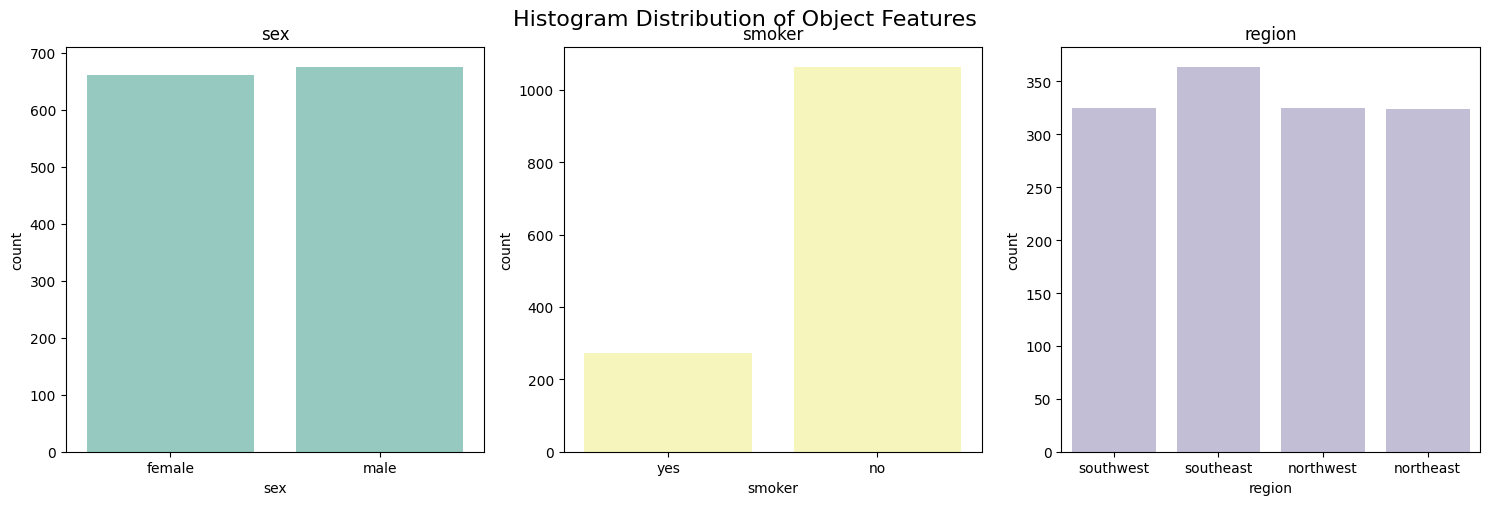

In [11]:
object_cols = dataframe.select_dtypes(include="object").columns

num_cols = len(object_cols)
nrows = (num_cols + 2) // 3


colours = sns.color_palette("Set3", num_cols)

plt.figure(figsize=(15, 5 * nrows))
for i, col in enumerate(object_cols):
    plt.subplot(nrows, 3, i + 1)
    sns.countplot(x=dataframe[col], color=colours[i])
    plt.title(col)

plt.tight_layout()
plt.suptitle("Histogram Distribution of Object Features", fontsize=16, y=1.002)
plt.show()

## Any outliers?


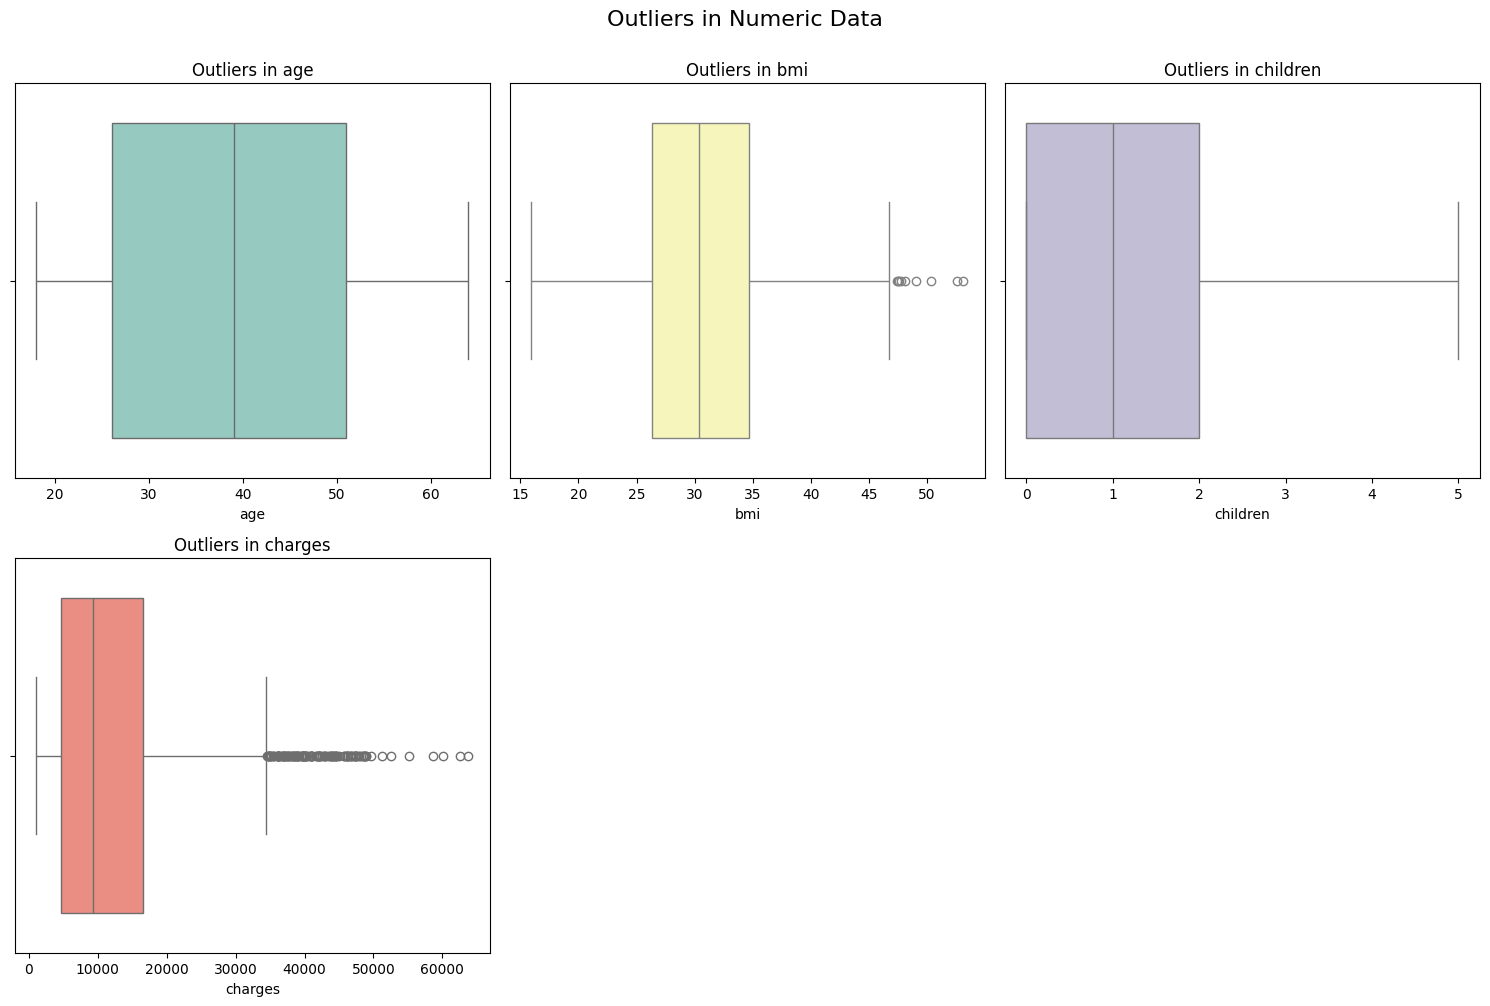

In [12]:
numeric_cols = dataframe.select_dtypes(include="number").columns

num_cols = len(numeric_cols)
nrows = (num_cols + 2) // 3
colours = sns.color_palette("Set3", num_cols)

plt.figure(figsize=(15, 5 * nrows))
for i, col in enumerate(numeric_cols):
    plt.subplot(nrows, 3, i + 1)  # Create subplot
    sns.boxplot(x=dataframe[col], color=colours[i])
    plt.title(f"Outliers in {col}")
    plt.xlabel(col)

plt.suptitle("Outliers in Numeric Data", fontsize=16, y=1.002)
plt.tight_layout()
plt.show()

## Correlation of features

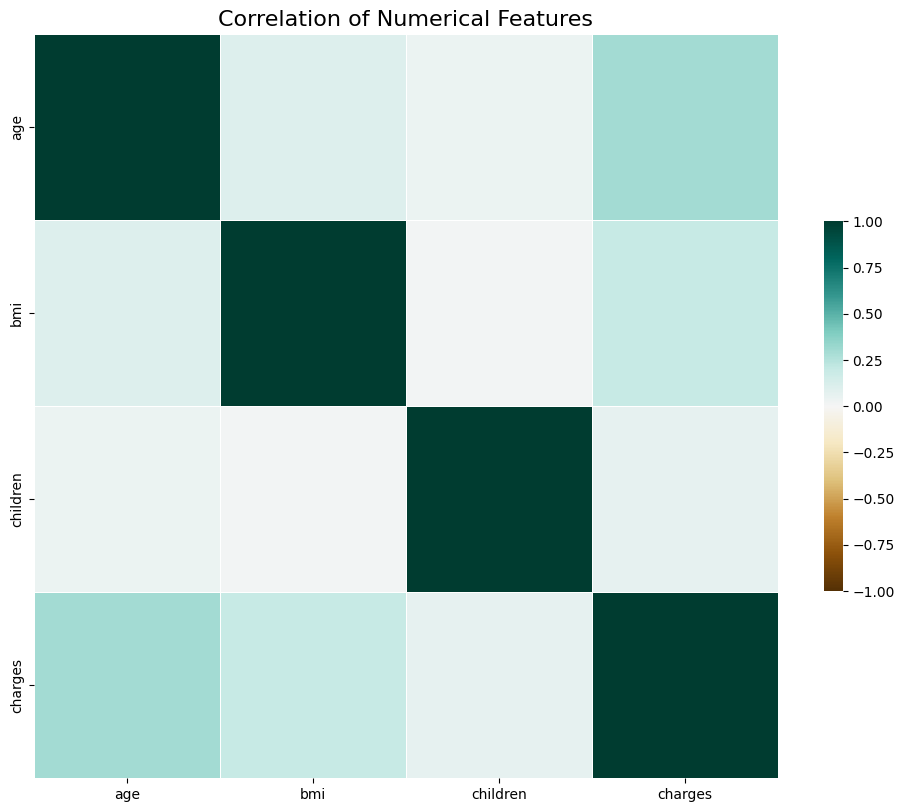

In [13]:
plt.figure(figsize=(12, 12))
corr = dataframe.corr(numeric_only=True)
ax = sns.heatmap(
    corr,
    vmin=-1,
    vmax=1,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.4},
    cmap="BrBG",
)
ax.set(xlabel="", ylabel="")
plt.title("Correlation of Numerical Features", fontsize=16)
plt.show()

## Preprocessing

### Deal with missing values

- As the age is an important factor as shown in the correlation matrix, and the dataset is small the rows cannot just be dropped
- The best way to impute the values could be though working out what the age for these rows should be based on other data 

In [14]:
missing_age_rows = dataframe[dataframe["age"].isnull()]
print(missing_age_rows)

age     sex     bmi  children smoker     region      charges
5     NaN  female  25.740         0     no  southeast   3756.62160
37    NaN    male  20.800         0     no  southwest   2302.30000
135   NaN  female  28.050         0     no  southeast   2155.68150
190   NaN    male  31.570         0     no  southeast  12557.60530
264   NaN  female  38.060         3     no  southeast  20462.99766
265   NaN    male  42.350         3    yes  southeast  46151.12450
407   NaN  female  23.600         1     no  southwest   8539.67100
409   NaN    male  30.030         1     no  southeast   4074.45370
482   NaN  female  31.350         0     no  southeast   1622.18850
496   NaN  female  23.600         2     no  southwest   4931.64700
549   NaN  female  46.200         0    yes  southeast  45863.20500
551   NaN  female  28.930         0     no  southeast   3972.92470
674   NaN  female  43.890         2    yes  southeast  46200.98510
777   NaN    male  39.805         0     no  northeast   7448.40395
895   NaN  female  44.000         0     no  southwest  13063.88300
988   NaN    male  34.675         0     no  northeast   4518.82625
1066  NaN    male  37.290         2     no  southeast   8978.18510
1153  NaN  female  35.815         1     no  northwest   5630.45785
1249  NaN    male  33.630         1    yes  northeast  37607.52770
1324  NaN    male  25.935         1     no  northwest   4239.89265

In [ ]:
imputer = KNNImputer(n_neighbors=5)
dataframe[["age"]] = imputer.fit_transform(dataframe[["age"]])

# Check to make sure there are no missing values now after imputing the ages
missing_age_rows = dataframe[dataframe["age"].isnull()]
print(missing_age_rows)

Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []

In [16]:
dataframe.head(6)

,age,sex,bmi,children,smoker,region,charges
0,19.000000,female,27.900,0,yes,southwest,16884.92400
1,18.000000,male,33.770,1,no,southeast,1725.55230
2,28.000000,male,33.000,3,no,southeast,4449.46200
3,33.000000,male,22.705,0,no,northwest,21984.47061
4,32.000000,male,28.880,0,no,northwest,3866.85520
5,39.216237,female,25.740,0,no,southeast,3756.62160


### Encode the categorical variables

## Feature engineering

BMI is currently split into different categories so for this I am going to create column for bmi category 

BMI categories:

- Underweight: BMI < 18.5
- Normal weight: BMI 18.5 - 24.9
- Overweight: BMI 25 - 29.9
- Obesity: BMI 30 and above

In [17]:
# Define BMI categories
bins = [0, 18.5, 24.9, 29.9, float("inf")]  # Define the edges of the bins
labels = [
    "Underweight",
    "Normal weight",
    "Overweight",
    "Obesity",
]  # Labels for each range

# Create a new 'bmi_category' column based on the defined ranges
dataframe["bmi_category"] = pd.cut(dataframe["bmi"], bins=bins, labels=labels)

dataframe.head()

,age,sex,bmi,children,smoker,region,charges,bmi_category
0,19.0,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18.0,male,33.770,1,no,southeast,1725.55230,Obesity
2,28.0,male,33.000,3,no,southeast,4449.46200,Obesity
3,33.0,male,22.705,0,no,northwest,21984.47061,Normal weight
4,32.0,male,28.880,0,no,northwest,3866.85520,Overweight


In [18]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   age           1338 non-null   float64 
 1   sex           1338 non-null   object  
 2   bmi           1338 non-null   float64 
 3   children      1338 non-null   int64   
 4   smoker        1338 non-null   object  
 5   region        1338 non-null   object  
 6   charges       1338 non-null   float64 
 7   bmi_category  1338 non-null   category
dtypes: category(1), float64(3), int64(1), object(3)
memory usage: 74.8+ KB


## EDA summary

### Observations

- Target distribution is positively skewed

**- 20 missing values in age column**
  - Age is an important feature shown in the correlation matrix. It is also a small dataset
  so it is important to deal with these missing values rather than just dropping them.
  To do this I made use of a KNN imputer to try and give the best approximate age. 

**- numerical features distribution**
  - age is positively skewed
  - bmi is symmetrical 
  - children is positivelty skewed
  - charges is positively skewed

**- Object features distribution**
  - Sex is symmetrical 
  - smoker is uneven distribution (around 800 more non-smokers)
  - region is a fairly even distribution
  
#### Outliers
- BMI and charges


### Questions
- Does the distribution of smokers respresent smokers vs non smokers in the general population?
- As there is a high proportion of categorical features, what will be the best way to tuen these into numeric?

## Create Training and test datasets

#### Carry out the preprocessing as described above

- One hot encode the categorical features
- Scale the data, using either Min max scaler
- Split into features and label (X and y) and then into train and test datasets
- save the one hot encoder and scaler to be used for predictions

In [ ]:
# Select categorical columns (object and category types)
object_cols = dataframe.select_dtypes(include="object").columns
category_cols = dataframe.select_dtypes(include="category").columns
object_cols = object_cols.append(category_cols)

print(f"Categorical columns: {object_cols}")

# Define the preprocessor (OneHotEncoding for categorical columns)
preprocessor = ColumnTransformer(
    transformers=[
        (
            "cat",
            OneHotEncoder(),
            object_cols,
        )  # One-hot encoding for categorical columns
    ],
    remainder="passthrough",  # Keep numeric columns as they are
)

X = dataframe.drop(columns=["charges"])
y = dataframe["charges"]


X_transformed = preprocessor.fit_transform(X)

joblib.dump(preprocessor, "col_transformer.pkl")
X_transformed_df = pd.DataFrame(
    X_transformed, columns=preprocessor.get_feature_names_out()
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_transformed_df, y, test_size=0.2, random_state=42
)

m_mScaler = MinMaxScaler()
X_train_scaled = m_mScaler.fit_transform(X_train)

X_test_scaled = m_mScaler.transform(X_test)

joblib.dump(m_mScaler, "minmax_scaler.pkl")

Categorical columns: Index(['sex', 'smoker', 'region', 'bmi_category'], dtype='object')

['minmax_scaler.pkl']

## Traing and testing models

## Training function


In [ ]:
# Create a function to fit and train models and show the predictions


results_dict = {}  # Store the results from the models -> convert to pd.dataframe


def fit_and_predict(X_train, X_test, y_train, y_test, model, model_name):
    """
    Takes the training and test data
    Fits the model given and gives metrics on how well it is doing

    Args:
        X_train (list): X training set
        X_test (list): X test set
        y_train (list): y train set
        y_test (list): y test set
        model (model): machine learning model to fit and predict
        model_name (str): model name

    Returns:
        list, float, model: list of predictions, r2 score, trained model
    """

    model = model
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2s = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)

    results_dict[model_name] = r2s

    print("Model: {}".format(model_name))
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"r2 score: {r2s}")

    return predictions, r2s, model

### Example of a training and looking at performance of model

In [21]:
preds, mse, trained_model_1 = fit_and_predict(
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    model=LinearRegression(),
    model_name="Linear regression",
)

Model: Linear regression

Mean Squared Error: 34274462.74529583

Mean Absolute Error: 4362.88710943194

r2 score: 0.7792287098518933

## Trying different models 
- without hyperparameter tuning
- with hyperparameter tuning - **This is done in the below section**

## Next step:
- Save the best 2 models using joblib
- Save the preprocessing objects such as scaler/onehotencoder
- Use the models to demonstrate making predictions (Use ipywidgets for slider and input to easily adjust the persons information) 

In [ ]:
# Have hyperparameter tuned
dtr = DecisionTreeRegressor(
    criterion="absolute_error",
    max_depth=5,
    max_features=None,
    max_leaf_nodes=None,
    min_samples_leaf=5,
    min_samples_split=2,
)
xgr = XGBRegressor(
    colsample_bytree=1.0,
    learning_rate=0.01,
    max_depth=3,
    min_child_weight=5,
    n_estimators=300,
    subsample=0.8,
)
xgr_optunaed = XGBRegressor(
    learning_rate=0.02320542296870936,
    max_depth=2,
    min_child_weight=4,
    n_estimators=325,
    subsample=0.7696763482800417,
    colsample_bytree=0.6624305100711059,
    gamma=1.0734011514931848e-08,
    reg_alpha=1.0811494165849225,
    reg_lambda=1.2373677652130754e-07,
)

catboost_params = {
    "iterations": 400,
    "learning_rate": 0.01431995298948914,
    "depth": 4,
    "l2_leaf_reg": 1.6098925842242227,
    "bagging_temperature": 0.4944015913612306,
    "border_count": 209,
    "random_strength": 0.1533092449089928,
}

cbr_hp_tuned = CatBoostRegressor(**catboost_params)

lgbm_r_best_params = {
    "boosting_type": "gbdt",
    "num_leaves": 34,
    "max_depth": 15,
    "learning_rate": 0.010704531622389239,
    "n_estimators": 600,
    "subsample": 0.7473064747491451,
    "colsample_bytree": 0.6897083044869945,
    "reg_alpha": 0.0008853899877183763,
    "reg_lambda": 0.00022280132969950255,
    "min_child_samples": 74,
}

lgb_hp = LGBMRegressor(**lgbm_r_best_params)


# Models not tuned
lr = LinearRegression()
rfr = RandomForestRegressor()

models = [
    ("Linear regression", lr),
    ("Random forest regressor", rfr),
    ("Decision tree regressor", dtr),
    ("XGB regressor", xgr),
    ("XGB regressorn hp optuna", xgr_optunaed),
    ("catboost regressor optuna hp", cbr_hp_tuned),
    ("LGBM regressor hp optuna", lgb_hp),
]

for name, mod in models:
    preds, r2_result, mod_t = fit_and_predict(
        X_train, X_test, y_train, y_test, mod, name
    )

print("Model Results: ")
print(results_dict, "\n")

Model: Linear regression

Mean Squared Error: 34274462.74529583

Mean Absolute Error: 4362.88710943194

r2 score: 0.7792287098518933

Model: Random forest regressor

Mean Squared Error: 21829212.1855292

Mean Absolute Error: 2591.421267133458

r2 score: 0.8593920093531591

Model: Decision tree regressor

Mean Squared Error: 21216112.081840526

Mean Absolute Error: 1939.0513658544776

r2 score: 0.863341156620241

Model: XGB regressor

Mean Squared Error: 18985819.502688237

Mean Absolute Error: 2630.6746676487287

r2 score: 0.8777070877149532

Model: XGB regressorn hp optuna

Mean Squared Error: 18252609.91419815

Mean Absolute Error: 2443.9542167887703

r2 score: 0.8824298933794165

0:	learn: 11874.8374633	total: 55.6ms	remaining: 22.2s
1:	learn: 11737.2022435	total: 56ms	remaining: 11.2s
2:	learn: 11604.4683017	total: 56.3ms	remaining: 7.45s
3:	learn: 11471.5000708	total: 56.5ms	remaining: 5.6s
4:	learn: 11343.1159921	total: 56.9ms	remaining: 4.5s
5:	learn: 11217.8297348	total: 57.1ms	remaining: 3.75s
6:	learn: 11093.7636672	total: 57.3ms	remaining: 3.22s
7:	learn: 10969.3116154	total: 57.5ms	remaining: 2.82s
8:	learn: 10846.1077512	total: 57.8ms	remaining: 2.51s
9:	learn: 10725.8128409	total: 58ms	remaining: 2.26s
10:	learn: 10608.5913768	total: 58.3ms	remaining: 2.06s
11:	learn: 10491.7136430	total: 58.5ms	remaining: 1.89s
12:	learn: 10378.9722953	total: 58.7ms	remaining: 1.75s
13:	learn: 10265.6425799	total: 58.9ms	remaining: 1.62s
14:	learn: 10153.5976052	total: 59.2ms	remaining: 1.52s
15:	learn: 10044.5705605	total: 59.4ms	remaining: 1.43s
16:	learn: 9938.4919778	total: 59.6ms	remaining: 1.34s
17:	learn: 9831.9689276	total: 59.8ms	remaining: 1.27s
18:	learn:

Model: catboost regressor optuna hp

Mean Squared Error: 18637106.059977632

Mean Absolute Error: 2458.115189351549

r2 score: 0.8799532474056627

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000924 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 332
[LightGBM] [Info] Number of data points in the train set: 1070, number of used features: 14
[LightGBM] [Info] Start training from score 13346.089733
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

Model: LGBM regressor hp optuna

Mean Squared Error: 18759642.98263837

Mean Absolute Error: 2546.328595980066

r2 score: 0.8791639532099338

Model Results:

{
    'Linear regression': 0.7792287098518933,
    'Random forest regressor': 0.8593920093531591,
    'Decision tree regressor': 0.863341156620241,
    'XGB regressor': 0.8777070877149532,
    'XGB regressorn hp optuna': 0.8824298933794165,
    'catboost regressor optuna hp': 0.8799532474056627,
    'LGBM regressor hp optuna': 0.8791639532099338
}

## Hyperparameter Tuning

#### The next step is hyperparameter tuning 

- Using grid search
- Using optuna study

The Metric used to assess the model performance is r2 score.

### XGBoost Gridsearch CV

In [ ]:
param_grid = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 4, 5],
    "min_child_weight": [1, 3, 5],
    "subsample": [0.8, 0.9, 1.0],
    "colsample_bytree": [0.8, 0.9, 1.0],
}

xgb_model = XGBRegressor()

grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring="r2")
grid_search.fit(X_train, y_train)

# best hyperparameters
best_params = grid_search.best_params_

# Fit the model with the best hyperparameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Evaluate the best model on the test set
r2 = best_model.score(X_test, y_test)
print("Best Hyperparameters: {}".format(best_params))
print("Accuracy on test set: {}".format(r2))

'\nparam_grid = {\n    \'n_estimators\': [100, 200, 300],\n    \'learning_rate\': [0.01, 0.1, 0.2],\n    \'max_depth\': [3, 4, 5],\n    \'min_child_weight\': [1, 3, 5],\n    \'subsample\': [0.8, 0.9, 1.0],\n    \'colsample_bytree\': [0.8, 0.9, 1.0]\n}\n \n# Create an XGBoost model\nxgb_model = XGBRegressor()\n \n# Perform GridSearchCV\ngrid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring=\'r2\')\ngrid_search.fit(X_train, y_train)\n \n# Get the best hyperparameters\nbest_params = grid_search.best_params_\n \n# Fit the model with the best hyperparameters on the entire dataset\nbest_model = grid_search.best_estimator_\nbest_model.fit(X_train, y_train)\n \n# Evaluate the best model on the test set\nr2 = best_model.score(X_test, y_test)\nprint(f"Best Hyperparameters: {best_params}")\nprint(f"Accuracy on test set: {r2:.2f}")'

### XGB regressor gave a good r2 score after hyperparameter tuning, can it be better?

- Previous score: 0.8779103461244412
- Optuna tuned: 0.8831712707099375

Yes! A small increase!

### Hyperparameter tuning with optuna 

In [ ]:
def objective(trial):

    params = {
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.005, 0.05),
        "max_depth": trial.suggest_int("max_depth", 2, 6),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "n_estimators": trial.suggest_int("n_estimators", 100, 500),
        "subsample": trial.suggest_uniform("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_uniform("colsample_bytree", 0.6, 1.0),
        "gamma": trial.suggest_loguniform("gamma", 1e-8, 1.0),
        "reg_alpha": trial.suggest_loguniform("reg_alpha", 1e-8, 10.0),
        "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-8, 10.0),
    }

    model = XGBRegressor(**params)
    score = cross_val_score(model, X_train, y_train, cv=3, scoring="r2")
    return score.mean()


try:
    # Run the optimization
    study = optuna.create_study(
        direction="maximize",
        storage="sqlite:///XGBR_insurance_study.db",
        study_name="XGBR_study",
    )  # Create thw  study and save to a db
    study.optimize(objective, n_trials=50)
except Exception as e:
    print("Error: {}".format(e))
# Best parameters
print(study.best_params)
print(study.best_trial)

'try:\n# Run the optimization\n    study = optuna.create_study(\n        direction="maximize", storage="sqlite:///XGBR_insurance_study.db", study_name="XGBR_study"\n    )  # Create thw  study and save to a db\n    study.optimize(objective, n_trials=50)\nexcept Exception as e:\n    print("Error: {}".format(e))\n# Best parameters\nprint(study.best_params)\nprint(study.best_trial)'

Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 5, 
'n_estimators': 300, 'subsample': 0.8}

### Decision tree regressor Gridsearch CV

In [ ]:
param_grid = {
    "max_depth": [None, 5, 10, 20, 30],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 5, 10, 20],
    "max_features": [None, "sqrt", "log2"],
    "max_leaf_nodes": [None, 10, 20, 50],
    "criterion": ["squared_error", "friedman_mse", "absolute_error"],
}
# Create an XGBoost model
dtr_model = DecisionTreeRegressor()

# Perform GridSearchCV with cross validation
grid_search = GridSearchCV(dtr_model, param_grid, cv=5, scoring="r2")
grid_search.fit(X_train, y_train)

# best params
best_params = grid_search.best_params_

# Fit the model with the best hparams
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Evaluate the model
r2 = best_model.score(X_test, y_test)
print("Best Hyperparameters: {}".format(best_params))
print("R2 on test set: {}".format(r2))

'param_grid = {\n    \'max_depth\': [None, 5, 10, 20, 30],\n    \'min_samples_split\': [2, 5, 10, 20],\n    \'min_samples_leaf\': [1, 5, 10, 20],\n    \'max_features\': [None, \'sqrt\', \'log2\'],\n    \'max_leaf_nodes\': [None, 10, 20, 50],\n    \'criterion\': [\'squared_error\', \'friedman_mse\', \'absolute_error\']\n}\n# Create an XGBoost model\ndtr_model = DecisionTreeRegressor()\n \n# Perform GridSearchCV\ngrid_search = GridSearchCV(dtr_model, param_grid, cv=5, scoring=\'r2\')\ngrid_search.fit(X_train, y_train)\n \n# Get the best hyperparameters\nbest_params = grid_search.best_params_\n \n# Fit the model with the best hyperparameters on the entire dataset\nbest_model = grid_search.best_estimator_\nbest_model.fit(X_train, y_train)\n \n# Evaluate the best model on the test set\nr2 = best_model.score(X_test, y_test)\nprint(f"Best Hyperparameters: {best_params}")\nprint(f"R2 on test set: {r2:.2f}")'

### LGBMRegressor Gridsearch CV

In [ ]:
param_grid = {
    "n_estimators": [100, 200, 500, 1000],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth": [3, 5, 7, 10, -1],
    "num_leaves": [15, 31, 63, 127],
    "min_child_samples": [10, 20, 50, 100],
    "min_child_weight": [1e-5, 1e-3, 1e-2, 0.1],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "reg_alpha": [0, 0.1, 1, 10],
    "reg_lambda": [0, 0.1, 1, 10],
}

lgb_model = LGBMRegressor()

grid_search = GridSearchCV(lgb_model, param_grid, cv=5, scoring="r2")
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

r2 = best_model.score(X_test, y_test)
print("Best Hyperparameters: {}".format(best_params))
print("R2 on test set: {}".format(r2))

'param_grid = {\n    \'n_estimators\': [100, 200, 500, 1000],\n    \'learning_rate\': [0.01, 0.05, 0.1, 0.2],\n    \'max_depth\': [3, 5, 7, 10, -1],\n    \'num_leaves\': [15, 31, 63, 127],\n    \'min_child_samples\': [10, 20, 50, 100],\n    \'min_child_weight\': [1e-5, 1e-3, 1e-2, 0.1],\n    \'subsample\': [0.6, 0.8, 1.0],\n    \'colsample_bytree\': [0.6, 0.8, 1.0],\n    \'reg_alpha\': [0, 0.1, 1, 10],\n    \'reg_lambda\': [0, 0.1, 1, 10],\n}\n \n# Create an XGBoost model\nlgb_model = LGBMRegressor()\n \n# Perform GridSearchCV\ngrid_search = GridSearchCV(lgb_model, param_grid, cv=5, scoring=\'r2\')\ngrid_search.fit(X_train, y_train)\n \n# Get the best hyperparameters\nbest_params = grid_search.best_params_\n \n# Fit the model with the best hyperparameters on the entire dataset\nbest_model = grid_search.best_estimator_\nbest_model.fit(X_train, y_train)\n \n# Evaluate the best model on the test set\nr2 = best_model.score(X_test, y_test)\nprint(f"Best Hyperparameters: {best_params}")\npri

### Catboost hyperparameter tuning using optuna

In [ ]:
import optuna
from sklearn.model_selection import cross_val_score
from dask.distributed import wait
import optuna_integration

from dask.distributed import Client, LocalCluster, wait

# Create a local cluster to experiment with dask to see if it speeds up the study
cluster = LocalCluster()
client = Client(cluster)

print(client)

backend_storage = optuna.storages.InMemoryStorage()
dask_storage = optuna.integration.DaskStorage(storage=backend_storage)


def objective(trial):

    params = {
        "iterations": trial.suggest_int("iterations", 100, 1000, step=100),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "depth": trial.suggest_int("depth", 4, 10),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1e-2, 10.0, log=True),
        "bagging_temperature": trial.suggest_float("bagging_temperature", 0.0, 1.0),
        "border_count": trial.suggest_int("border_count", 32, 255),
        "random_strength": trial.suggest_float("random_strength", 1e-3, 10.0, log=True),
        "verbose": 0,  # Suppress output during training
    }

    model = CatBoostRegressor(**params)
    model.fit(X_train, y_train)
    score = cross_val_score(model, X_train, y_train, cv=5, scoring="r2")
    return score.mean()


try:
    # Run the optimization if a study has already been stored it will throw an error. This prevents it running again.
    study_cbr = optuna.create_study(
        direction="maximize", storage=dask_storage, study_name="CBR_insurance_study"
    )
    # study_lgbm.optimize(objective, n_trials=7,show_progress_bar=True, n_jobs=-1 ) # To run wihtout dask

    futures = [
        client.submit(
            study_cbr.optimize,
            objective,
            n_trials=50,
            pure=False,
            show_progress_bar=True,
        )
    ]

    _ = wait(futures)

except Exception as e:
    print("Error: {}".format(e))

cbr_best_prams = study_cbr.best_params
print(cbr_best_prams)

cluster.close()
client.close()

<Client: 'tcp://127.0.0.1:62757' processes=4 threads=8, memory=8.00 GiB>

/var/folders/xh/fvvnghrs13n5sqcsmprbn_c80000gn/T/ipykernel_29785/2217379153.py:15: ExperimentalWarning: DaskStorage is experimental (supported from v3.1.0). The interface can change in the future.
  dask_storage = optuna.integration.DaskStorage(storage=backend_storage)
[I 2024-12-11 16:36:56,367] A new study created in memory with name: CBR_insurance_study
/Users/markpeacock/MSc_artificial_intelligence/Machine learning/Assessment/.venv/lib/python3.12/site-packages/distributed/protocol/pickle.py:90: ExperimentalWarning: DaskStorage is experimental (supported from v3.1.0). The interface can change in the future.
  return pickle.loads(x, buffers=buffers)
/Users/markpeacock/MSc_artificial_intelligence/Machine learning/Assessment/.venv/lib/python3.12/site-packages/distributed/protocol/pickle.py:90: ExperimentalWarning: DaskStorage is experimental (supported from v3.1.0). The interface can change in the future.
  return pickle.loads(x, buffers=buffers)
Best trial: 0. Best value: 0.842375:   

[I 2024-12-11 16:36:58,237] Trial 0 finished with value: 0.8423754754559634 and parameters: {'iterations': 500, 'learning_rate': 0.01920907152493417, 'depth': 7, 'l2_leaf_reg': 4.542021592899341, 'bagging_temperature': 0.13930659771893095, 'border_count': 98, 'random_strength': 0.6780520935061376}. Best is trial 0 with value: 0.8423754754559634.


Best trial: 0. Best value: 0.842375:   4%|▍         | 2/50 [00:06<02:59,  3.74s/it]

[I 2024-12-11 16:37:03,758] Trial 1 finished with value: 0.8225303750213806 and parameters: {'iterations': 800, 'learning_rate': 0.027114039444953834, 'depth': 9, 'l2_leaf_reg': 2.4195171411714487, 'bagging_temperature': 0.9161830168310972, 'border_count': 206, 'random_strength': 0.0010950310722887835}. Best is trial 0 with value: 0.8423754754559634.


Best trial: 2. Best value: 0.845367:   6%|▌         | 3/50 [00:07<01:44,  2.23s/it]

[I 2024-12-11 16:37:04,199] Trial 2 finished with value: 0.8453671875468928 and parameters: {'iterations': 200, 'learning_rate': 0.021462754211712034, 'depth': 6, 'l2_leaf_reg': 0.06705057019563256, 'bagging_temperature': 0.434237238358154, 'border_count': 206, 'random_strength': 0.16471741425261288}. Best is trial 2 with value: 0.8453671875468928.


Best trial: 2. Best value: 0.845367:   8%|▊         | 4/50 [00:07<01:09,  1.51s/it]

[I 2024-12-11 16:37:04,606] Trial 3 finished with value: 0.8218361160570348 and parameters: {'iterations': 200, 'learning_rate': 0.09455508984670687, 'depth': 6, 'l2_leaf_reg': 0.05964211297740933, 'bagging_temperature': 0.6402998854426519, 'border_count': 161, 'random_strength': 0.003130040160644209}. Best is trial 2 with value: 0.8453671875468928.


Best trial: 2. Best value: 0.845367:  10%|█         | 5/50 [00:10<01:37,  2.16s/it]

[I 2024-12-11 16:37:07,928] Trial 4 finished with value: 0.8099498186458417 and parameters: {'iterations': 800, 'learning_rate': 0.07061913814822728, 'depth': 9, 'l2_leaf_reg': 0.011336790872874956, 'bagging_temperature': 0.8311491187734804, 'border_count': 96, 'random_strength': 5.440741753762641}. Best is trial 2 with value: 0.8453671875468928.


Best trial: 2. Best value: 0.845367:  12%|█▏        | 6/50 [00:11<01:11,  1.62s/it]

[I 2024-12-11 16:37:08,503] Trial 5 finished with value: 0.8347838928242798 and parameters: {'iterations': 200, 'learning_rate': 0.06413922528288624, 'depth': 7, 'l2_leaf_reg': 2.7667259292013515, 'bagging_temperature': 0.7409325015062025, 'border_count': 222, 'random_strength': 0.0073985592915215325}. Best is trial 2 with value: 0.8453671875468928.


Best trial: 2. Best value: 0.845367:  14%|█▍        | 7/50 [00:12<00:56,  1.30s/it]

[I 2024-12-11 16:37:09,146] Trial 6 finished with value: 0.8333289202438603 and parameters: {'iterations': 400, 'learning_rate': 0.04403133063647345, 'depth': 5, 'l2_leaf_reg': 0.3465307443028701, 'bagging_temperature': 0.16701606904688426, 'border_count': 237, 'random_strength': 0.7264422796420463}. Best is trial 2 with value: 0.8453671875468928.


Best trial: 2. Best value: 0.845367:  16%|█▌        | 8/50 [00:12<00:47,  1.14s/it]

[I 2024-12-11 16:37:09,943] Trial 7 finished with value: 0.8356325478719576 and parameters: {'iterations': 700, 'learning_rate': 0.04979934439741077, 'depth': 4, 'l2_leaf_reg': 3.5792974463280944, 'bagging_temperature': 0.5088161875031285, 'border_count': 121, 'random_strength': 0.05365293826008843}. Best is trial 2 with value: 0.8453671875468928.


Best trial: 2. Best value: 0.845367:  18%|█▊        | 9/50 [00:14<00:50,  1.24s/it]

[I 2024-12-11 16:37:11,410] Trial 8 finished with value: 0.833144648448717 and parameters: {'iterations': 300, 'learning_rate': 0.02223259409880959, 'depth': 10, 'l2_leaf_reg': 0.010778972880457436, 'bagging_temperature': 0.4458046436591657, 'border_count': 62, 'random_strength': 0.9683423413011162}. Best is trial 2 with value: 0.8453671875468928.


Best trial: 2. Best value: 0.845367:  22%|██▏       | 11/50 [00:15<00:30,  1.28it/s]

[I 2024-12-11 16:37:12,041] Trial 9 finished with value: 0.8444380944785527 and parameters: {'iterations': 300, 'learning_rate': 0.025000645645848207, 'depth': 6, 'l2_leaf_reg': 0.5121326857974267, 'bagging_temperature': 0.46368304863957754, 'border_count': 172, 'random_strength': 0.6869239475138066}. Best is trial 2 with value: 0.8453671875468928.
[I 2024-12-11 16:37:12,203] Trial 10 finished with value: 0.7387987916698628 and parameters: {'iterations': 100, 'learning_rate': 0.010494127700884969, 'depth': 4, 'l2_leaf_reg': 0.06913117477956285, 'bagging_temperature': 0.2855343164283881, 'border_count': 255, 'random_strength': 0.038035719305179176}. Best is trial 2 with value: 0.8453671875468928.


Best trial: 2. Best value: 0.845367:  24%|██▍       | 12/50 [00:17<00:42,  1.13s/it]

[I 2024-12-11 16:37:14,123] Trial 11 finished with value: 0.7908067359913182 and parameters: {'iterations': 1000, 'learning_rate': 0.20193658073405987, 'depth': 6, 'l2_leaf_reg': 0.48586617424316947, 'bagging_temperature': 0.3893263560165424, 'border_count': 172, 'random_strength': 0.17936359958015813}. Best is trial 2 with value: 0.8453671875468928.


Best trial: 2. Best value: 0.845367:  26%|██▌       | 13/50 [00:17<00:37,  1.01s/it]

[I 2024-12-11 16:37:14,850] Trial 12 finished with value: 0.8451727328395016 and parameters: {'iterations': 400, 'learning_rate': 0.010278215454820662, 'depth': 6, 'l2_leaf_reg': 0.09271173914895695, 'bagging_temperature': 0.6129039287775632, 'border_count': 190, 'random_strength': 6.031328449083743}. Best is trial 2 with value: 0.8453671875468928.


Best trial: 2. Best value: 0.845367:  30%|███       | 15/50 [00:19<00:31,  1.11it/s]

[I 2024-12-11 16:37:16,540] Trial 13 finished with value: 0.8449451520546809 and parameters: {'iterations': 500, 'learning_rate': 0.01220711390712942, 'depth': 8, 'l2_leaf_reg': 0.08254297881480217, 'bagging_temperature': 0.6271306612411961, 'border_count': 200, 'random_strength': 2.242096280632073}. Best is trial 2 with value: 0.8453671875468928.
[I 2024-12-11 16:37:16,711] Trial 14 finished with value: 0.7559841973884165 and parameters: {'iterations': 100, 'learning_rate': 0.01512381671705397, 'depth': 5, 'l2_leaf_reg': 0.1451357457285895, 'bagging_temperature': 0.017080820505936845, 'border_count': 194, 'random_strength': 9.524250948844427}. Best is trial 2 with value: 0.8453671875468928.


Best trial: 2. Best value: 0.845367:  32%|███▏      | 16/50 [00:20<00:30,  1.12it/s]

[I 2024-12-11 16:37:17,583] Trial 15 finished with value: 0.8265298606809509 and parameters: {'iterations': 600, 'learning_rate': 0.03209035947502083, 'depth': 5, 'l2_leaf_reg': 0.03305528475250473, 'bagging_temperature': 0.6221325354587302, 'border_count': 149, 'random_strength': 0.22250568564660608}. Best is trial 2 with value: 0.8453671875468928.


Best trial: 2. Best value: 0.845367:  34%|███▍      | 17/50 [00:21<00:31,  1.04it/s]

[I 2024-12-11 16:37:18,724] Trial 16 finished with value: 0.825175144692021 and parameters: {'iterations': 400, 'learning_rate': 0.01597296152728897, 'depth': 8, 'l2_leaf_reg': 0.026387887812127434, 'bagging_temperature': 0.3163975617058012, 'border_count': 34, 'random_strength': 0.016629364548108035}. Best is trial 2 with value: 0.8453671875468928.


Best trial: 2. Best value: 0.845367:  36%|███▌      | 18/50 [00:22<00:26,  1.20it/s]

[I 2024-12-11 16:37:19,252] Trial 17 finished with value: 0.8418167877584025 and parameters: {'iterations': 300, 'learning_rate': 0.010954338508511675, 'depth': 6, 'l2_leaf_reg': 1.1180956699421922, 'bagging_temperature': 0.5481238492057761, 'border_count': 137, 'random_strength': 2.9232999012694636}. Best is trial 2 with value: 0.8453671875468928.


Best trial: 2. Best value: 0.845367:  38%|███▊      | 19/50 [00:23<00:28,  1.10it/s]

[I 2024-12-11 16:37:20,341] Trial 18 finished with value: 0.7991750830313414 and parameters: {'iterations': 400, 'learning_rate': 0.2917566596354998, 'depth': 7, 'l2_leaf_reg': 0.1519698574904763, 'bagging_temperature': 0.7712535740841651, 'border_count': 186, 'random_strength': 0.198801064636275}. Best is trial 2 with value: 0.8453671875468928.


Best trial: 2. Best value: 0.845367:  40%|████      | 20/50 [00:24<00:25,  1.16it/s]

[I 2024-12-11 16:37:21,085] Trial 19 finished with value: 0.8436987175293928 and parameters: {'iterations': 200, 'learning_rate': 0.035101531645828715, 'depth': 8, 'l2_leaf_reg': 0.17163686262506844, 'bagging_temperature': 0.9929415169822631, 'border_count': 227, 'random_strength': 2.021457185278837}. Best is trial 2 with value: 0.8453671875468928.


Best trial: 2. Best value: 0.845367:  42%|████▏     | 21/50 [00:24<00:25,  1.13it/s]

[I 2024-12-11 16:37:22,023] Trial 20 finished with value: 0.8278452652040666 and parameters: {'iterations': 600, 'learning_rate': 0.12727899261870126, 'depth': 5, 'l2_leaf_reg': 9.844645359465426, 'bagging_temperature': 0.33154398751629927, 'border_count': 255, 'random_strength': 0.05217055220495545}. Best is trial 2 with value: 0.8453671875468928.


Best trial: 2. Best value: 0.845367:  44%|████▍     | 22/50 [00:26<00:31,  1.13s/it]

[I 2024-12-11 16:37:23,726] Trial 21 finished with value: 0.8446789973447185 and parameters: {'iterations': 500, 'learning_rate': 0.013385513093976776, 'depth': 8, 'l2_leaf_reg': 0.072002945903351, 'bagging_temperature': 0.6427681288914673, 'border_count': 207, 'random_strength': 3.2732033409314303}. Best is trial 2 with value: 0.8453671875468928.


Best trial: 22. Best value: 0.84629:  46%|████▌     | 23/50 [00:28<00:33,  1.24s/it]

[I 2024-12-11 16:37:25,219] Trial 22 finished with value: 0.8462901506527091 and parameters: {'iterations': 500, 'learning_rate': 0.010441042587058112, 'depth': 8, 'l2_leaf_reg': 0.029551146759249206, 'bagging_temperature': 0.5787238065495447, 'border_count': 191, 'random_strength': 9.7066742528698}. Best is trial 22 with value: 0.8462901506527091.


Best trial: 23. Best value: 0.84679:  48%|████▊     | 24/50 [00:29<00:30,  1.16s/it]

[I 2024-12-11 16:37:26,199] Trial 23 finished with value: 0.8467899328820898 and parameters: {'iterations': 400, 'learning_rate': 0.017557007886047443, 'depth': 7, 'l2_leaf_reg': 0.026568428199859735, 'bagging_temperature': 0.5612012502345147, 'border_count': 178, 'random_strength': 6.308556365586056}. Best is trial 23 with value: 0.8467899328820898.


Best trial: 23. Best value: 0.84679:  50%|█████     | 25/50 [00:32<00:41,  1.68s/it]

[I 2024-12-11 16:37:29,081] Trial 24 finished with value: 0.8321810886253923 and parameters: {'iterations': 700, 'learning_rate': 0.019545057509579467, 'depth': 9, 'l2_leaf_reg': 0.02929573768362211, 'bagging_temperature': 0.7206618871849184, 'border_count': 135, 'random_strength': 9.190422372891998}. Best is trial 23 with value: 0.8467899328820898.


Best trial: 23. Best value: 0.84679:  52%|█████▏    | 26/50 [00:32<00:33,  1.40s/it]

[I 2024-12-11 16:37:29,849] Trial 25 finished with value: 0.8457319391331992 and parameters: {'iterations': 300, 'learning_rate': 0.0169622064776979, 'depth': 7, 'l2_leaf_reg': 0.016259642868641563, 'bagging_temperature': 0.5285896131897496, 'border_count': 173, 'random_strength': 1.2448651586344899}. Best is trial 23 with value: 0.8467899328820898.


Best trial: 23. Best value: 0.84679:  54%|█████▍    | 27/50 [00:33<00:27,  1.20s/it]

[I 2024-12-11 16:37:30,565] Trial 26 finished with value: 0.8459540939319542 and parameters: {'iterations': 300, 'learning_rate': 0.015003495136709222, 'depth': 7, 'l2_leaf_reg': 0.01851399963046852, 'bagging_temperature': 0.541762718044607, 'border_count': 172, 'random_strength': 1.3016491061588125}. Best is trial 23 with value: 0.8467899328820898.


Best trial: 23. Best value: 0.84679:  56%|█████▌    | 28/50 [00:35<00:32,  1.48s/it]

[I 2024-12-11 16:37:32,718] Trial 27 finished with value: 0.8212801587281462 and parameters: {'iterations': 600, 'learning_rate': 0.036918205613955826, 'depth': 8, 'l2_leaf_reg': 0.018794529289356276, 'bagging_temperature': 0.5597706251095599, 'border_count': 154, 'random_strength': 0.39096204591523326}. Best is trial 23 with value: 0.8467899328820898.


Best trial: 23. Best value: 0.84679:  58%|█████▊    | 29/50 [00:37<00:36,  1.72s/it]

[I 2024-12-11 16:37:35,001] Trial 28 finished with value: 0.8416087808893422 and parameters: {'iterations': 500, 'learning_rate': 0.014283288483004284, 'depth': 10, 'l2_leaf_reg': 0.03811778804409509, 'bagging_temperature': 0.7038763275920112, 'border_count': 119, 'random_strength': 4.921350766497118}. Best is trial 23 with value: 0.8467899328820898.


Best trial: 23. Best value: 0.84679:  60%|██████    | 30/50 [00:38<00:29,  1.47s/it]

[I 2024-12-11 16:37:35,867] Trial 29 finished with value: 0.8443410272166604 and parameters: {'iterations': 400, 'learning_rate': 0.01773658968150121, 'depth': 7, 'l2_leaf_reg': 0.016929635861107413, 'bagging_temperature': 0.21983878832371762, 'border_count': 96, 'random_strength': 2.472260251813423}. Best is trial 23 with value: 0.8467899328820898.


Best trial: 23. Best value: 0.84679:  62%|██████▏   | 31/50 [00:41<00:35,  1.85s/it]

[I 2024-12-11 16:37:38,618] Trial 30 finished with value: 0.8251884327023296 and parameters: {'iterations': 500, 'learning_rate': 0.02955898921782205, 'depth': 9, 'l2_leaf_reg': 0.046382909916064856, 'bagging_temperature': 0.8254681523045355, 'border_count': 175, 'random_strength': 1.2858057315983862}. Best is trial 23 with value: 0.8467899328820898.


Best trial: 23. Best value: 0.84679:  64%|██████▍   | 32/50 [00:42<00:27,  1.51s/it]

[I 2024-12-11 16:37:39,332] Trial 31 finished with value: 0.8457877112215693 and parameters: {'iterations': 300, 'learning_rate': 0.018115704871944492, 'depth': 7, 'l2_leaf_reg': 0.016695453851468367, 'bagging_temperature': 0.5646719893067155, 'border_count': 165, 'random_strength': 1.6595946640555972}. Best is trial 23 with value: 0.8467899328820898.


Best trial: 23. Best value: 0.84679:  66%|██████▌   | 33/50 [00:43<00:23,  1.36s/it]

[I 2024-12-11 16:37:40,327] Trial 32 finished with value: 0.8424357304933938 and parameters: {'iterations': 400, 'learning_rate': 0.01326044660626647, 'depth': 7, 'l2_leaf_reg': 0.02012546838052384, 'bagging_temperature': 0.39886089884616627, 'border_count': 161, 'random_strength': 0.3442825881625307}. Best is trial 23 with value: 0.8467899328820898.


Best trial: 23. Best value: 0.84679:  68%|██████▊   | 34/50 [00:44<00:19,  1.24s/it]

[I 2024-12-11 16:37:41,290] Trial 33 finished with value: 0.8435858847330872 and parameters: {'iterations': 300, 'learning_rate': 0.0244094203523105, 'depth': 8, 'l2_leaf_reg': 0.01224268950001239, 'bagging_temperature': 0.5803320871556334, 'border_count': 182, 'random_strength': 3.9661669900061907}. Best is trial 23 with value: 0.8467899328820898.


Best trial: 23. Best value: 0.84679:  70%|███████   | 35/50 [00:44<00:15,  1.02s/it]

[I 2024-12-11 16:37:41,800] Trial 34 finished with value: 0.8450262936982578 and parameters: {'iterations': 200, 'learning_rate': 0.020706412132453125, 'depth': 7, 'l2_leaf_reg': 0.024138972685112062, 'bagging_temperature': 0.4865046287594365, 'border_count': 208, 'random_strength': 9.761990513566598}. Best is trial 23 with value: 0.8467899328820898.


Best trial: 23. Best value: 0.84679:  72%|███████▏  | 36/50 [00:45<00:14,  1.01s/it]

[I 2024-12-11 16:37:42,775] Trial 35 finished with value: 0.843985266021787 and parameters: {'iterations': 300, 'learning_rate': 0.018226587812609267, 'depth': 8, 'l2_leaf_reg': 0.04661304007640174, 'bagging_temperature': 0.6765850914620416, 'border_count': 162, 'random_strength': 1.5771683359784054}. Best is trial 23 with value: 0.8467899328820898.


Best trial: 23. Best value: 0.84679:  74%|███████▍  | 37/50 [00:48<00:19,  1.52s/it]

[I 2024-12-11 16:37:45,506] Trial 36 finished with value: 0.8382910792331326 and parameters: {'iterations': 1000, 'learning_rate': 0.012161456450553611, 'depth': 7, 'l2_leaf_reg': 0.014157993334365002, 'bagging_temperature': 0.3927852145043197, 'border_count': 219, 'random_strength': 5.8241540701061965}. Best is trial 23 with value: 0.8467899328820898.
[I 2024-12-11 16:37:45,920] Trial 37 finished with value: 0.8418730989227807 and parameters: {'iterations': 200, 'learning_rate': 0.02818723652945138, 'depth': 6, 'l2_leaf_reg': 0.01001614012439878, 'bagging_temperature': 0.7832186352056418, 'border_count': 119, 'random_strength': 0.0012954654069427794}. Best is trial 23 with value: 0.8467899328820898.


Best trial: 23. Best value: 0.84679:  78%|███████▊  | 39/50 [00:51<00:18,  1.67s/it]

[I 2024-12-11 16:37:48,715] Trial 38 finished with value: 0.8061283046128412 and parameters: {'iterations': 500, 'learning_rate': 0.09126643960994177, 'depth': 9, 'l2_leaf_reg': 0.047296066690235665, 'bagging_temperature': 0.49965852141416933, 'border_count': 151, 'random_strength': 0.4753740592209287}. Best is trial 23 with value: 0.8467899328820898.


Best trial: 23. Best value: 0.84679:  80%|████████  | 40/50 [00:53<00:16,  1.67s/it]

[I 2024-12-11 16:37:50,392] Trial 39 finished with value: 0.820087667481938 and parameters: {'iterations': 700, 'learning_rate': 0.045116139681288005, 'depth': 7, 'l2_leaf_reg': 1.1466789391610948, 'bagging_temperature': 0.8937902276708745, 'border_count': 137, 'random_strength': 4.045515440741499}. Best is trial 23 with value: 0.8467899328820898.


Best trial: 23. Best value: 0.84679:  82%|████████▏ | 41/50 [00:53<00:12,  1.34s/it]

[I 2024-12-11 16:37:50,940] Trial 40 finished with value: 0.7876363339256136 and parameters: {'iterations': 100, 'learning_rate': 0.015003104854398121, 'depth': 9, 'l2_leaf_reg': 0.23479617492877483, 'bagging_temperature': 0.5790976201974525, 'border_count': 241, 'random_strength': 0.9024930783704217}. Best is trial 23 with value: 0.8467899328820898.


Best trial: 23. Best value: 0.84679:  84%|████████▍ | 42/50 [00:54<00:09,  1.17s/it]

[I 2024-12-11 16:37:51,720] Trial 41 finished with value: 0.8461446459827252 and parameters: {'iterations': 300, 'learning_rate': 0.01607975369043403, 'depth': 7, 'l2_leaf_reg': 0.016857814947583042, 'bagging_temperature': 0.5235967707597202, 'border_count': 178, 'random_strength': 1.0712339464647307}. Best is trial 23 with value: 0.8467899328820898.


Best trial: 23. Best value: 0.84679:  86%|████████▌ | 43/50 [00:55<00:07,  1.03s/it]

[I 2024-12-11 16:37:52,416] Trial 42 finished with value: 0.8458483711172061 and parameters: {'iterations': 300, 'learning_rate': 0.02211654135045659, 'depth': 7, 'l2_leaf_reg': 0.022261590571886453, 'bagging_temperature': 0.45244357621261155, 'border_count': 163, 'random_strength': 1.7225409676721166}. Best is trial 23 with value: 0.8467899328820898.


Best trial: 23. Best value: 0.84679:  88%|████████▊ | 44/50 [00:55<00:05,  1.19it/s]

[I 2024-12-11 16:37:52,821] Trial 43 finished with value: 0.8466715453119467 and parameters: {'iterations': 200, 'learning_rate': 0.02326605361180809, 'depth': 6, 'l2_leaf_reg': 0.029737720410767585, 'bagging_temperature': 0.4262026159597845, 'border_count': 186, 'random_strength': 6.34430826028558}. Best is trial 23 with value: 0.8467899328820898.


Best trial: 23. Best value: 0.84679:  90%|█████████ | 45/50 [00:56<00:03,  1.39it/s]

[I 2024-12-11 16:37:53,255] Trial 44 finished with value: 0.824141738815553 and parameters: {'iterations': 200, 'learning_rate': 0.011677282843242903, 'depth': 6, 'l2_leaf_reg': 0.03645095006725142, 'bagging_temperature': 0.42224037640823286, 'border_count': 215, 'random_strength': 5.920905122085441}. Best is trial 23 with value: 0.8467899328820898.


Best trial: 23. Best value: 0.84679:  92%|█████████▏| 46/50 [00:57<00:03,  1.25it/s]

[I 2024-12-11 16:37:54,254] Trial 45 finished with value: 0.8454283092499206 and parameters: {'iterations': 400, 'learning_rate': 0.010070655041429193, 'depth': 6, 'l2_leaf_reg': 0.09815082127437037, 'bagging_temperature': 0.5066514139023802, 'border_count': 180, 'random_strength': 0.11035866063955328}. Best is trial 23 with value: 0.8467899328820898.


Best trial: 46. Best value: 0.846835:  94%|█████████▍| 47/50 [00:57<00:02,  1.45it/s]

[I 2024-12-11 16:37:54,676] Trial 46 finished with value: 0.8468354259569484 and parameters: {'iterations': 200, 'learning_rate': 0.024847770481214806, 'depth': 6, 'l2_leaf_reg': 0.05439706326923235, 'bagging_temperature': 0.3328392900726684, 'border_count': 197, 'random_strength': 7.158500707871558}. Best is trial 46 with value: 0.8468354259569484.


Best trial: 46. Best value: 0.846835:  96%|█████████▌| 48/50 [00:57<00:01,  1.84it/s]

[I 2024-12-11 16:37:54,878] Trial 47 finished with value: 0.8263897409642251 and parameters: {'iterations': 100, 'learning_rate': 0.025164517427327653, 'depth': 5, 'l2_leaf_reg': 0.058017138452621464, 'bagging_temperature': 0.24020611038323972, 'border_count': 196, 'random_strength': 7.210989065354785}. Best is trial 46 with value: 0.8468354259569484.


Best trial: 46. Best value: 0.846835:  98%|█████████▊| 49/50 [00:58<00:00,  1.91it/s]

[I 2024-12-11 16:37:55,360] Trial 48 finished with value: 0.8397280733071015 and parameters: {'iterations': 200, 'learning_rate': 0.06101879282770354, 'depth': 6, 'l2_leaf_reg': 0.11119874350532864, 'bagging_temperature': 0.35260180529833535, 'border_count': 230, 'random_strength': 3.0755672931756544}. Best is trial 46 with value: 0.8468354259569484.
[I 2024-12-11 16:37:55,779] Trial 49 finished with value: 0.84709016996106 and parameters: {'iterations': 200, 'learning_rate': 0.03970801218092837, 'depth': 6, 'l2_leaf_reg': 0.029856903146051363, 'bagging_temperature': 0.27869325386103855, 'border_count': 190, 'random_strength': 7.0686740165356}. Best is trial 49 with value: 0.84709016996106.


Best trial: 49. Best value: 0.84709: 100%|██████████| 50/50 [00:58<00:00,  1.17s/it] 


{
    'iterations': 200,
    'learning_rate': 0.03970801218092837,
    'depth': 6,
    'l2_leaf_reg': 0.029856903146051363,
    'bagging_temperature': 0.27869325386103855,
    'border_count': 190,
    'random_strength': 7.0686740165356
}

2024-12-11 16:37:56,014 - distributed.worker - ERROR - Failed to communicate with scheduler during heartbeat.
Traceback (most recent call last):
  File "/Users/markpeacock/MSc_artificial_intelligence/Machine learning/Assessment/.venv/lib/python3.12/site-packages/distributed/comm/tcp.py", line 225, in read
    frames_nosplit_nbytes_bin = await stream.read_bytes(fmt_size)
                                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
tornado.iostream.StreamClosedError: Stream is closed

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/Users/markpeacock/MSc_artificial_intelligence/Machine learning/Assessment/.venv/lib/python3.12/site-packages/distributed/worker.py", line 1269, in heartbeat
    response = await retry_operation(
               ^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/markpeacock/MSc_artificial_intelligence/Machine learning/Assessment/.venv/lib/python3.12/site-packages/distributed/utils_comm.py", line 441, in r

## LGBM Regressor hyperparameter tuning using optuna

In [ ]:
import optuna
from sklearn.model_selection import cross_val_score
from dask.distributed import wait
import optuna_integration

from dask.distributed import Client, LocalCluster, wait

cluster = LocalCluster()
client = Client(cluster)

print(client)

backend_storage = optuna.storages.InMemoryStorage()
dask_storage = optuna.integration.DaskStorage(storage=backend_storage)


def objective(trial):

    params = {
        "objective": "regression",
        "metric": "rmse",  # Root Mean Squared Error (RMSE) metric
        "boosting_type": trial.suggest_categorical(
            "boosting_type", ["gbdt", "dart", "goss"]
        ),
        "num_leaves": trial.suggest_int("num_leaves", 31, 255),
        "max_depth": trial.suggest_int("max_depth", -1, 20),  # -1 means no limit
        "learning_rate": trial.suggest_float("learning_rate", 1e-5, 0.1, log=True),
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000, step=100),
        "subsample": trial.suggest_float(
            "subsample", 0.4, 1.0
        ),  # Subsample ratio of the training set
        "colsample_bytree": trial.suggest_float(
            "colsample_bytree", 0.4, 1.0
        ),  # Feature fraction
        "reg_alpha": trial.suggest_float(
            "reg_alpha", 1e-5, 10.0, log=True
        ),  # L1 regularization
        "reg_lambda": trial.suggest_float(
            "reg_lambda", 1e-5, 10.0, log=True
        ),  # L2 regularization
        "min_child_samples": trial.suggest_int(
            "min_child_samples", 1, 100
        ),  # Minimum number of samples in a leaf
        "verbose": -1,  # Suppress output during training
    }

    model = LGBMRegressor(**params)
    model.fit(X_train, y_train)
    score = cross_val_score(model, X_train, y_train, cv=5, scoring="r2")
    return score.mean()


try:
    study_lgbmr = optuna.create_study(
        direction="maximize", storage=dask_storage, study_name="LGBMR_insurance_study"
    )
    # study_lgbm.optimize(objective, n_trials=7,show_progress_bar=True, n_jobs=-1 )

    futures = [
        client.submit(
            study_lgbmr.optimize,
            objective,
            n_trials=50,
            pure=False,
            show_progress_bar=True,
        )
    ]

    _ = wait(futures)

except Exception as e:
    print("Error: {}".format(e))

lgbmr_best_prams = study_lgbmr.best_params
print(lgbmr_best_prams)

cluster.close()
client.close()

<Client: 'tcp://127.0.0.1:62821' processes=4 threads=8, memory=8.00 GiB>

/var/folders/xh/fvvnghrs13n5sqcsmprbn_c80000gn/T/ipykernel_29785/2040573342.py:15: ExperimentalWarning: DaskStorage is experimental (supported from v3.1.0). The interface can change in the future.
  dask_storage = optuna.integration.DaskStorage(storage=backend_storage)
[I 2024-12-11 16:37:57,596] A new study created in memory with name: LGBMR_insurance_study
/Users/markpeacock/MSc_artificial_intelligence/Machine learning/Assessment/.venv/lib/python3.12/site-packages/distributed/protocol/pickle.py:90: ExperimentalWarning: DaskStorage is experimental (supported from v3.1.0). The interface can change in the future.
  return pickle.loads(x, buffers=buffers)
/Users/markpeacock/MSc_artificial_intelligence/Machine learning/Assessment/.venv/lib/python3.12/site-packages/distributed/protocol/pickle.py:90: ExperimentalWarning: DaskStorage is experimental (supported from v3.1.0). The interface can change in the future.
  return pickle.loads(x, buffers=buffers)
/Users/markpeacock/MSc_artificial_int

[I 2024-12-11 16:38:30,008] Trial 0 finished with value: 0.8317394538171387 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 227, 'max_depth': 19, 'learning_rate': 0.005203681014329892, 'n_estimators': 1000, 'subsample': 0.7674495191771928, 'colsample_bytree': 0.6502727878513787, 'reg_alpha': 0.01475362587982344, 'reg_lambda': 0.034610501067991635, 'min_child_samples': 13}. Best is trial 0 with value: 0.8317394538171387.


Best trial: 0. Best value: 0.831739:   4%|▍         | 2/50 [00:33<11:07, 13.90s/it]

[I 2024-12-11 16:38:31,429] Trial 1 finished with value: 0.20609313777938326 and parameters: {'boosting_type': 'goss', 'num_leaves': 225, 'max_depth': 18, 'learning_rate': 0.0007106552329558155, 'n_estimators': 300, 'subsample': 0.7415699953473943, 'colsample_bytree': 0.6477614735426929, 'reg_alpha': 0.0007176106592653366, 'reg_lambda': 0.016780634512916146, 'min_child_samples': 94}. Best is trial 0 with value: 0.8317394538171387.


Best trial: 0. Best value: 0.831739:   6%|▌         | 3/50 [00:39<08:06, 10.34s/it]

[I 2024-12-11 16:38:37,544] Trial 2 finished with value: 0.8306860238391156 and parameters: {'boosting_type': 'goss', 'num_leaves': 34, 'max_depth': -1, 'learning_rate': 0.0265569964954063, 'n_estimators': 800, 'subsample': 0.5386163954326242, 'colsample_bytree': 0.9128772920423984, 'reg_alpha': 0.0026838778631130007, 'reg_lambda': 4.758490602126969, 'min_child_samples': 21}. Best is trial 0 with value: 0.8317394538171387.


Best trial: 3. Best value: 0.845123:   8%|▊         | 4/50 [00:41<05:32,  7.23s/it]

[I 2024-12-11 16:38:39,989] Trial 3 finished with value: 0.8451225635121442 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 42, 'max_depth': 9, 'learning_rate': 0.01362838353951698, 'n_estimators': 400, 'subsample': 0.6834090157859805, 'colsample_bytree': 0.5858702242614485, 'reg_alpha': 1.6792102201270577e-05, 'reg_lambda': 1.3366139020853718, 'min_child_samples': 79}. Best is trial 3 with value: 0.8451225635121442.


Best trial: 3. Best value: 0.845123:  10%|█         | 5/50 [00:44<04:18,  5.75s/it]

[I 2024-12-11 16:38:43,118] Trial 4 finished with value: 0.1794514630604327 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 148, 'max_depth': 17, 'learning_rate': 0.000438379174936442, 'n_estimators': 400, 'subsample': 0.9440471648948497, 'colsample_bytree': 0.5055175670998955, 'reg_alpha': 0.07878435466641678, 'reg_lambda': 0.000788192383364403, 'min_child_samples': 55}. Best is trial 3 with value: 0.8451225635121442.


Best trial: 3. Best value: 0.845123:  12%|█▏        | 6/50 [00:48<03:42,  5.05s/it]

[I 2024-12-11 16:38:46,812] Trial 5 finished with value: 0.01627013486055018 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 138, 'max_depth': 7, 'learning_rate': 6.309949816340568e-05, 'n_estimators': 200, 'subsample': 0.8294079268795433, 'colsample_bytree': 0.8974185802476469, 'reg_alpha': 2.795028283577546, 'reg_lambda': 0.00020934830552562416, 'min_child_samples': 21}. Best is trial 3 with value: 0.8451225635121442.
[I 2024-12-11 16:38:48,630] Trial 6 finished with value: 0.5430268484479723 and parameters: {'boosting_type': 'goss', 'num_leaves': 77, 'max_depth': 1, 'learning_rate': 0.0016013928168840564, 'n_estimators': 1000, 'subsample': 0.6107761371672675, 'colsample_bytree': 0.5070959094326831, 'reg_alpha': 0.044168531418893014, 'reg_lambda': 0.03190497480940424, 'min_child_samples': 63}. Best is trial 3 with value: 0.8451225635121442.


Best trial: 3. Best value: 0.845123:  16%|█▌        | 8/50 [01:02<04:33,  6.51s/it]

[I 2024-12-11 16:39:00,532] Trial 7 finished with value: -0.5366083976487224 and parameters: {'boosting_type': 'dart', 'num_leaves': 50, 'max_depth': 20, 'learning_rate': 0.0004959057938116743, 'n_estimators': 900, 'subsample': 0.4262723955949743, 'colsample_bytree': 0.40259244563334207, 'reg_alpha': 0.0044624883605982055, 'reg_lambda': 0.47490054768275924, 'min_child_samples': 85}. Best is trial 3 with value: 0.8451225635121442.


Best trial: 3. Best value: 0.845123:  18%|█▊        | 9/50 [01:05<03:46,  5.54s/it]

[I 2024-12-11 16:39:03,921] Trial 8 finished with value: 0.19133048060135974 and parameters: {'boosting_type': 'goss', 'num_leaves': 173, 'max_depth': 10, 'learning_rate': 0.00034840470694604843, 'n_estimators': 600, 'subsample': 0.7717158272337328, 'colsample_bytree': 0.4509725425590669, 'reg_alpha': 0.0012712711036670231, 'reg_lambda': 0.024157506318589726, 'min_child_samples': 75}. Best is trial 3 with value: 0.8451225635121442.


Best trial: 3. Best value: 0.845123:  20%|██        | 10/50 [01:07<02:59,  4.49s/it]

[I 2024-12-11 16:39:06,061] Trial 9 finished with value: 0.815806020990731 and parameters: {'boosting_type': 'goss', 'num_leaves': 145, 'max_depth': 18, 'learning_rate': 0.009239436049578765, 'n_estimators': 500, 'subsample': 0.9024494794723282, 'colsample_bytree': 0.9906294581037776, 'reg_alpha': 0.0013295397694682474, 'reg_lambda': 0.002026824087710387, 'min_child_samples': 56}. Best is trial 3 with value: 0.8451225635121442.


Best trial: 3. Best value: 0.845123:  22%|██▏       | 11/50 [01:08<02:12,  3.40s/it]

[I 2024-12-11 16:39:07,005] Trial 10 finished with value: 0.7957941666044156 and parameters: {'boosting_type': 'dart', 'num_leaves': 93, 'max_depth': 11, 'learning_rate': 0.0791530078021862, 'n_estimators': 100, 'subsample': 0.6222342198401202, 'colsample_bytree': 0.7369185708886251, 'reg_alpha': 1.1596093171556433e-05, 'reg_lambda': 8.942242575912818, 'min_child_samples': 39}. Best is trial 3 with value: 0.8451225635121442.


Best trial: 3. Best value: 0.845123:  24%|██▍       | 12/50 [01:27<05:09,  8.14s/it]

[I 2024-12-11 16:39:25,997] Trial 11 finished with value: 0.8287189729310009 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 250, 'max_depth': 6, 'learning_rate': 0.006217342001762802, 'n_estimators': 700, 'subsample': 0.6785392518332529, 'colsample_bytree': 0.6469687229921811, 'reg_alpha': 1.83635039784206e-05, 'reg_lambda': 0.32057626696698766, 'min_child_samples': 2}. Best is trial 3 with value: 0.8451225635121442.


Best trial: 3. Best value: 0.845123:  26%|██▌       | 13/50 [01:33<04:37,  7.50s/it]

[I 2024-12-11 16:39:31,999] Trial 12 finished with value: 0.8316187733229714 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 197, 'max_depth': 14, 'learning_rate': 0.004644002201872275, 'n_estimators': 500, 'subsample': 0.8217152547495314, 'colsample_bytree': 0.7239205578002426, 'reg_alpha': 0.7344988651215116, 'reg_lambda': 0.4502547683445223, 'min_child_samples': 34}. Best is trial 3 with value: 0.8451225635121442.


Best trial: 3. Best value: 0.845123:  28%|██▊       | 14/50 [02:38<14:55, 24.87s/it]

[I 2024-12-11 16:40:37,031] Trial 13 finished with value: 0.7996369067802511 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 107, 'max_depth': 13, 'learning_rate': 0.06694963647305824, 'n_estimators': 1000, 'subsample': 0.5054096727322218, 'colsample_bytree': 0.5808056343812927, 'reg_alpha': 0.0001473491306428968, 'reg_lambda': 0.13755510199722507, 'min_child_samples': 2}. Best is trial 3 with value: 0.8451225635121442.


Best trial: 3. Best value: 0.845123:  30%|███       | 15/50 [02:43<10:53, 18.68s/it]

[I 2024-12-11 16:40:41,357] Trial 14 finished with value: 0.008320830906048049 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 202, 'max_depth': 6, 'learning_rate': 1.1826890514374933e-05, 'n_estimators': 700, 'subsample': 0.6936608584499533, 'colsample_bytree': 0.7936617798152379, 'reg_alpha': 0.059972510033229655, 'reg_lambda': 1.795835112616284e-05, 'min_child_samples': 73}. Best is trial 3 with value: 0.8451225635121442.
[I 2024-12-11 16:40:42,692] Trial 15 finished with value: 0.45328757323419494 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 253, 'max_depth': 14, 'learning_rate': 0.0022802957362877407, 'n_estimators': 300, 'subsample': 0.9896509246831405, 'colsample_bytree': 0.5917546523631839, 'reg_alpha': 0.00019635066456948376, 'reg_lambda': 1.8819433045969034, 'min_child_samples': 95}. Best is trial 3 with value: 0.8451225635121442.


Best trial: 3. Best value: 0.845123:  34%|███▍      | 17/50 [02:47<05:45, 10.47s/it]

[I 2024-12-11 16:40:46,196] Trial 16 finished with value: 0.7980654570609628 and parameters: {'boosting_type': 'dart', 'num_leaves': 66, 'max_depth': 3, 'learning_rate': 0.018603582220595816, 'n_estimators': 400, 'subsample': 0.8303457576381759, 'colsample_bytree': 0.8108338315645968, 'reg_alpha': 0.014130281217377519, 'reg_lambda': 0.09202795234366869, 'min_child_samples': 40}. Best is trial 3 with value: 0.8451225635121442.


Best trial: 3. Best value: 0.845123:  36%|███▌      | 18/50 [03:00<05:59, 11.23s/it]

[I 2024-12-11 16:40:59,203] Trial 17 finished with value: 0.8187101287391029 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 115, 'max_depth': 8, 'learning_rate': 0.024017463984758382, 'n_estimators': 800, 'subsample': 0.6180621258522351, 'colsample_bytree': 0.5633229654608645, 'reg_alpha': 0.26894156213532333, 'reg_lambda': 0.002889178285096664, 'min_child_samples': 18}. Best is trial 3 with value: 0.8451225635121442.


Best trial: 3. Best value: 0.845123:  38%|███▊      | 19/50 [03:04<04:32,  8.79s/it]

[I 2024-12-11 16:41:02,303] Trial 18 finished with value: 0.08009763168672257 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 182, 'max_depth': 4, 'learning_rate': 0.0001000101080018628, 'n_estimators': 600, 'subsample': 0.7567519614951206, 'colsample_bytree': 0.6793733355008043, 'reg_alpha': 0.0001425716977398565, 'reg_lambda': 1.4078142984844821, 'min_child_samples': 76}. Best is trial 3 with value: 0.8451225635121442.
[I 2024-12-11 16:41:03,251] Trial 19 finished with value: 0.27779122740289997 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 220, 'max_depth': 12, 'learning_rate': 0.00307697215254659, 'n_estimators': 100, 'subsample': 0.5399402801433707, 'colsample_bytree': 0.5250403283895262, 'reg_alpha': 4.404756751922953, 'reg_lambda': 0.00563901205409517, 'min_child_samples': 47}. Best is trial 3 with value: 0.8451225635121442.


Best trial: 3. Best value: 0.845123:  42%|████▏     | 21/50 [03:09<02:49,  5.86s/it]

[I 2024-12-11 16:41:07,759] Trial 20 finished with value: 0.5367680176190663 and parameters: {'boosting_type': 'dart', 'num_leaves': 32, 'max_depth': 15, 'learning_rate': 0.007525961582730178, 'n_estimators': 400, 'subsample': 0.9047912383648735, 'colsample_bytree': 0.7866199414712812, 'reg_alpha': 0.015615928167723574, 'reg_lambda': 0.00015346496945984188, 'min_child_samples': 64}. Best is trial 3 with value: 0.8451225635121442.


Best trial: 3. Best value: 0.845123:  44%|████▍     | 22/50 [03:16<02:50,  6.10s/it]

[I 2024-12-11 16:41:14,426] Trial 21 finished with value: 0.8340225884594465 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 192, 'max_depth': 15, 'learning_rate': 0.0048967377543007095, 'n_estimators': 500, 'subsample': 0.8359137126378645, 'colsample_bytree': 0.7227461818567541, 'reg_alpha': 0.5509081473494116, 'reg_lambda': 0.6876777774871705, 'min_child_samples': 30}. Best is trial 3 with value: 0.8451225635121442.


Best trial: 3. Best value: 0.845123:  46%|████▌     | 23/50 [03:21<02:34,  5.73s/it]

[I 2024-12-11 16:41:19,308] Trial 22 finished with value: 0.8396723444387308 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 167, 'max_depth': 20, 'learning_rate': 0.013750583563491885, 'n_estimators': 300, 'subsample': 0.7924369451672983, 'colsample_bytree': 0.6335305076019843, 'reg_alpha': 0.38871641202941576, 'reg_lambda': 0.08293935872524134, 'min_child_samples': 26}. Best is trial 3 with value: 0.8451225635121442.


Best trial: 3. Best value: 0.845123:  48%|████▊     | 24/50 [03:25<02:15,  5.22s/it]

[I 2024-12-11 16:41:23,325] Trial 23 finished with value: 0.8420079641258937 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 168, 'max_depth': 16, 'learning_rate': 0.014099958416010335, 'n_estimators': 300, 'subsample': 0.847499686745418, 'colsample_bytree': 0.6126984872592112, 'reg_alpha': 1.1435001448900306, 'reg_lambda': 1.0568582722290323, 'min_child_samples': 30}. Best is trial 3 with value: 0.8451225635121442.


Best trial: 3. Best value: 0.845123:  50%|█████     | 25/50 [03:29<02:07,  5.11s/it]

[I 2024-12-11 16:41:28,168] Trial 24 finished with value: 0.8258988759670643 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 163, 'max_depth': 16, 'learning_rate': 0.04105082371585148, 'n_estimators': 300, 'subsample': 0.8915748782785687, 'colsample_bytree': 0.6182155337114216, 'reg_alpha': 1.4307313978813645, 'reg_lambda': 0.14952221728025802, 'min_child_samples': 28}. Best is trial 3 with value: 0.8451225635121442.


Best trial: 3. Best value: 0.845123:  52%|█████▏    | 26/50 [03:31<01:38,  4.09s/it]

[I 2024-12-11 16:41:29,902] Trial 25 finished with value: 0.8296335973231246 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 129, 'max_depth': 20, 'learning_rate': 0.014748024646317921, 'n_estimators': 200, 'subsample': 0.6620855456642073, 'colsample_bytree': 0.5360259390187063, 'reg_alpha': 9.990192671113372, 'reg_lambda': 2.122382620559648, 'min_child_samples': 46}. Best is trial 3 with value: 0.8451225635121442.


Best trial: 3. Best value: 0.845123:  54%|█████▍    | 27/50 [03:35<01:31,  3.98s/it]

[I 2024-12-11 16:41:33,600] Trial 26 finished with value: 0.21521518769682163 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 155, 'max_depth': 9, 'learning_rate': 0.0012454794687702384, 'n_estimators': 200, 'subsample': 0.713828046408425, 'colsample_bytree': 0.4547862360211603, 'reg_alpha': 0.2235061387504941, 'reg_lambda': 0.09165925901695589, 'min_child_samples': 15}. Best is trial 3 with value: 0.8451225635121442.


Best trial: 3. Best value: 0.845123:  56%|█████▌    | 28/50 [03:40<01:32,  4.20s/it]

[I 2024-12-11 16:41:38,309] Trial 27 finished with value: 0.8297929371986967 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 173, 'max_depth': 17, 'learning_rate': 0.039066133199798785, 'n_estimators': 300, 'subsample': 0.7909952721044038, 'colsample_bytree': 0.6178799863560457, 'reg_alpha': 4.076545940172382e-05, 'reg_lambda': 7.168945304666163, 'min_child_samples': 26}. Best is trial 3 with value: 0.8451225635121442.


Best trial: 3. Best value: 0.845123:  58%|█████▊    | 29/50 [03:46<01:40,  4.79s/it]

[I 2024-12-11 16:41:44,500] Trial 28 finished with value: 0.6956822213956823 and parameters: {'boosting_type': 'dart', 'num_leaves': 120, 'max_depth': 11, 'learning_rate': 0.011871116081219843, 'n_estimators': 400, 'subsample': 0.8622819794587181, 'colsample_bytree': 0.6803580928598322, 'reg_alpha': 0.16217228970116232, 'reg_lambda': 1.1684274708068587, 'min_child_samples': 36}. Best is trial 3 with value: 0.8451225635121442.


Best trial: 3. Best value: 0.845123:  60%|██████    | 30/50 [03:52<01:46,  5.35s/it]

[I 2024-12-11 16:41:51,137] Trial 29 finished with value: 0.8075198301028126 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 98, 'max_depth': 19, 'learning_rate': 0.09180523857451743, 'n_estimators': 200, 'subsample': 0.7280199633265181, 'colsample_bytree': 0.6024166707850783, 'reg_alpha': 1.1100684693515523, 'reg_lambda': 3.1731043883536207, 'min_child_samples': 10}. Best is trial 3 with value: 0.8451225635121442.


Best trial: 3. Best value: 0.845123:  62%|██████▏   | 31/50 [03:55<01:26,  4.58s/it]

[I 2024-12-11 16:41:53,917] Trial 30 finished with value: 0.28688117838937005 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 216, 'max_depth': 20, 'learning_rate': 0.002754559537968005, 'n_estimators': 100, 'subsample': 0.7853163481786424, 'colsample_bytree': 0.46105839784121727, 'reg_alpha': 3.613189661846044, 'reg_lambda': 0.22479449784246436, 'min_child_samples': 10}. Best is trial 3 with value: 0.8451225635121442.


Best trial: 3. Best value: 0.845123:  64%|██████▍   | 32/50 [04:03<01:37,  5.42s/it]

[I 2024-12-11 16:42:01,308] Trial 31 finished with value: 0.8381215445321404 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 194, 'max_depth': 16, 'learning_rate': 0.005839133373864917, 'n_estimators': 500, 'subsample': 0.8512653473579312, 'colsample_bytree': 0.7497456868384715, 'reg_alpha': 0.5524970527026237, 'reg_lambda': 0.7083005031487039, 'min_child_samples': 27}. Best is trial 3 with value: 0.8451225635121442.


Best trial: 3. Best value: 0.845123:  66%|██████▌   | 33/50 [04:05<01:14,  4.40s/it]

[I 2024-12-11 16:42:03,320] Trial 32 finished with value: 0.8257432937595167 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 207, 'max_depth': 18, 'learning_rate': 0.011974498993525326, 'n_estimators': 400, 'subsample': 0.9481212928592837, 'colsample_bytree': 0.6532264263716022, 'reg_alpha': 0.49717833195582695, 'reg_lambda': 0.05981000976740383, 'min_child_samples': 87}. Best is trial 3 with value: 0.8451225635121442.
[I 2024-12-11 16:42:08,099] Trial 33 finished with value: 0.8258396227753328 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 237, 'max_depth': 16, 'learning_rate': 0.03595448220659628, 'n_estimators': 300, 'subsample': 0.8655303712990844, 'colsample_bytree': 0.7640914026436871, 'reg_alpha': 9.407233122044646, 'reg_lambda': 0.6800964391186335, 'min_child_samples': 26}. Best is trial 3 with value: 0.8451225635121442.


Best trial: 3. Best value: 0.845123:  70%|███████   | 35/50 [04:15<01:12,  4.82s/it]

[I 2024-12-11 16:42:13,650] Trial 34 finished with value: 0.8336042764581997 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 163, 'max_depth': 13, 'learning_rate': 0.02481687380736715, 'n_estimators': 500, 'subsample': 0.7952850474833677, 'colsample_bytree': 0.8471922323253346, 'reg_alpha': 0.0248401848125972, 'reg_lambda': 0.01326262561514996, 'min_child_samples': 43}. Best is trial 3 with value: 0.8451225635121442.


Best trial: 3. Best value: 0.845123:  72%|███████▏  | 36/50 [04:18<00:59,  4.25s/it]

[I 2024-12-11 16:42:16,560] Trial 35 finished with value: 0.762936501948956 and parameters: {'boosting_type': 'goss', 'num_leaves': 182, 'max_depth': 17, 'learning_rate': 0.003710012045154106, 'n_estimators': 600, 'subsample': 0.7424758718379942, 'colsample_bytree': 0.5519562010022872, 'reg_alpha': 0.11173725302113344, 'reg_lambda': 3.8178599206611312, 'min_child_samples': 51}. Best is trial 3 with value: 0.8451225635121442.


Best trial: 3. Best value: 0.845123:  74%|███████▍  | 37/50 [04:23<00:57,  4.41s/it]

[I 2024-12-11 16:42:21,342] Trial 36 finished with value: 0.834954076746224 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 134, 'max_depth': 9, 'learning_rate': 0.009710656615443784, 'n_estimators': 300, 'subsample': 0.9493732857995683, 'colsample_bytree': 0.6470989287142029, 'reg_alpha': 0.007398245957025717, 'reg_lambda': 0.9538707149634744, 'min_child_samples': 22}. Best is trial 3 with value: 0.8451225635121442.


Best trial: 3. Best value: 0.845123:  76%|███████▌  | 38/50 [04:28<00:56,  4.72s/it]

[I 2024-12-11 16:42:26,795] Trial 37 finished with value: 0.4310103013242113 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 186, 'max_depth': 18, 'learning_rate': 0.0009920957093766552, 'n_estimators': 400, 'subsample': 0.6521206150964739, 'colsample_bytree': 0.696798537901604, 'reg_alpha': 1.5247631040737635, 'reg_lambda': 0.05235653332937487, 'min_child_samples': 32}. Best is trial 3 with value: 0.8451225635121442.


Best trial: 3. Best value: 0.845123:  78%|███████▊  | 39/50 [04:29<00:39,  3.60s/it]

[I 2024-12-11 16:42:27,765] Trial 38 finished with value: 0.7753758051373805 and parameters: {'boosting_type': 'goss', 'num_leaves': 156, 'max_depth': 19, 'learning_rate': 0.016962481127552168, 'n_estimators': 200, 'subsample': 0.585973819219298, 'colsample_bytree': 0.8532071199949572, 'reg_alpha': 0.3180226911673812, 'reg_lambda': 0.24150312359811874, 'min_child_samples': 62}. Best is trial 3 with value: 0.8451225635121442.


Best trial: 3. Best value: 0.845123:  80%|████████  | 40/50 [04:38<00:52,  5.28s/it]

[I 2024-12-11 16:42:36,965] Trial 39 finished with value: 0.8182731494212462 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 230, 'max_depth': 11, 'learning_rate': 0.04569109743901264, 'n_estimators': 500, 'subsample': 0.8639910667111201, 'colsample_bytree': 0.4853221250209966, 'reg_alpha': 0.03650689789922334, 'reg_lambda': 3.802477798522335, 'min_child_samples': 21}. Best is trial 3 with value: 0.8451225635121442.


Best trial: 3. Best value: 0.845123:  82%|████████▏ | 41/50 [04:40<00:39,  4.36s/it]

[I 2024-12-11 16:42:39,182] Trial 40 finished with value: 0.5489171386923295 and parameters: {'boosting_type': 'goss', 'num_leaves': 168, 'max_depth': 16, 'learning_rate': 0.0017735912821467536, 'n_estimators': 400, 'subsample': 0.810345891114357, 'colsample_bytree': 0.6350202510295854, 'reg_alpha': 0.0004255617647335647, 'reg_lambda': 0.03598614517933794, 'min_child_samples': 86}. Best is trial 3 with value: 0.8451225635121442.


Best trial: 3. Best value: 0.845123:  84%|████████▍ | 42/50 [04:45<00:36,  4.51s/it]

[I 2024-12-11 16:42:44,046] Trial 41 finished with value: 0.8279812027887392 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 49, 'max_depth': 9, 'learning_rate': 0.008099881187918838, 'n_estimators': 300, 'subsample': 0.9423423972707939, 'colsample_bytree': 0.6700850762684701, 'reg_alpha': 0.0026172975932683656, 'reg_lambda': 0.8429150621239372, 'min_child_samples': 23}. Best is trial 3 with value: 0.8451225635121442.


Best trial: 3. Best value: 0.845123:  86%|████████▌ | 43/50 [04:51<00:33,  4.83s/it]

[I 2024-12-11 16:42:49,615] Trial 42 finished with value: 0.8042673392945033 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 137, 'max_depth': 8, 'learning_rate': 0.009601868925902304, 'n_estimators': 200, 'subsample': 0.9788006741809802, 'colsample_bytree': 0.5754517904747518, 'reg_alpha': 0.004882049771289789, 'reg_lambda': 0.3835815180715834, 'min_child_samples': 9}. Best is trial 3 with value: 0.8451225635121442.


Best trial: 3. Best value: 0.845123:  88%|████████▊ | 44/50 [04:54<00:25,  4.28s/it]

[I 2024-12-11 16:42:52,598] Trial 43 finished with value: 0.811532759356834 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 80, 'max_depth': 10, 'learning_rate': 0.0058556098914454595, 'n_estimators': 300, 'subsample': 0.914141701024087, 'colsample_bytree': 0.7586390337126422, 'reg_alpha': 0.09600208995735847, 'reg_lambda': 1.1945437329830364, 'min_child_samples': 38}. Best is trial 3 with value: 0.8451225635121442.


Best trial: 3. Best value: 0.845123:  90%|█████████ | 45/50 [04:58<00:21,  4.35s/it]

[I 2024-12-11 16:42:57,130] Trial 44 finished with value: 0.8371806705608378 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 146, 'max_depth': 7, 'learning_rate': 0.02239860425621471, 'n_estimators': 300, 'subsample': 0.9353422743422432, 'colsample_bytree': 0.713740681581467, 'reg_alpha': 4.4236354195336467e-05, 'reg_lambda': 8.077445862326789, 'min_child_samples': 16}. Best is trial 3 with value: 0.8451225635121442.


Best trial: 3. Best value: 0.845123:  92%|█████████▏| 46/50 [05:04<00:19,  4.75s/it]

[I 2024-12-11 16:43:02,814] Trial 45 finished with value: 0.8415088009760959 and parameters: {'boosting_type': 'dart', 'num_leaves': 147, 'max_depth': 4, 'learning_rate': 0.060036016297822556, 'n_estimators': 500, 'subsample': 0.7658250389345945, 'colsample_bytree': 0.7230587572629266, 'reg_alpha': 6.909862796293325e-05, 'reg_lambda': 9.707515243498278, 'min_child_samples': 16}. Best is trial 3 with value: 0.8451225635121442.
[I 2024-12-11 16:43:34,673] Trial 46 finished with value: 0.8055714264010068 and parameters: {'boosting_type': 'dart', 'num_leaves': 155, 'max_depth': -1, 'learning_rate': 0.051449142637588235, 'n_estimators': 600, 'subsample': 0.6923308006616841, 'colsample_bytree': 0.9610863324761687, 'reg_alpha': 2.8411985044488722e-05, 'reg_lambda': 2.46045740168183, 'min_child_samples': 6}. Best is trial 3 with value: 0.8451225635121442.


Best trial: 3. Best value: 0.845123:  96%|█████████▌| 48/50 [05:44<00:22, 11.38s/it]

[I 2024-12-11 16:43:42,532] Trial 47 finished with value: 0.8068551472209847 and parameters: {'boosting_type': 'dart', 'num_leaves': 174, 'max_depth': 4, 'learning_rate': 0.06077080893812835, 'n_estimators': 700, 'subsample': 0.7696784090536182, 'colsample_bytree': 0.751118489326026, 'reg_alpha': 1.0872487256915478e-05, 'reg_lambda': 5.225634706127078, 'min_child_samples': 100}. Best is trial 3 with value: 0.8451225635121442.


Best trial: 3. Best value: 0.845123:  98%|█████████▊| 49/50 [05:48<00:09,  9.38s/it]

[I 2024-12-11 16:43:47,244] Trial 48 finished with value: 0.8408952441783164 and parameters: {'boosting_type': 'dart', 'num_leaves': 124, 'max_depth': 3, 'learning_rate': 0.028830524039058, 'n_estimators': 500, 'subsample': 0.743342974292585, 'colsample_bytree': 0.8246548163607713, 'reg_alpha': 2.1888801818389907, 'reg_lambda': 0.43125675822470044, 'min_child_samples': 32}. Best is trial 3 with value: 0.8451225635121442.
[I 2024-12-11 16:43:49,469] Trial 49 finished with value: -0.6171228721979934 and parameters: {'boosting_type': 'dart', 'num_leaves': 58, 'max_depth': 2, 'learning_rate': 0.00021707157263691659, 'n_estimators': 400, 'subsample': 0.7484938909114088, 'colsample_bytree': 0.9032614914881965, 'reg_alpha': 7.008607249027453e-05, 'reg_lambda': 0.16519812714180848, 'min_child_samples': 56}. Best is trial 3 with value: 0.8451225635121442.


Best trial: 3. Best value: 0.845123: 100%|██████████| 50/50 [05:51<00:00,  7.02s/it]


{
    'boosting_type': 'gbdt',
    'num_leaves': 42,
    'max_depth': 9,
    'learning_rate': 0.01362838353951698,
    'n_estimators': 400,
    'subsample': 0.6834090157859805,
    'colsample_bytree': 0.5858702242614485,
    'reg_alpha': 1.6792102201270577e-05,
    'reg_lambda': 1.3366139020853718,
    'min_child_samples': 79
}

2024-12-11 16:43:49,712 - distributed.worker - ERROR - Failed to communicate with scheduler during heartbeat.
Traceback (most recent call last):
  File "/Users/markpeacock/MSc_artificial_intelligence/Machine learning/Assessment/.venv/lib/python3.12/site-packages/distributed/comm/tcp.py", line 225, in read
    frames_nosplit_nbytes_bin = await stream.read_bytes(fmt_size)
                                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
tornado.iostream.StreamClosedError: Stream is closed

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/Users/markpeacock/MSc_artificial_intelligence/Machine learning/Assessment/.venv/lib/python3.12/site-packages/distributed/worker.py", line 1269, in heartbeat
    response = await retry_operation(
               ^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/markpeacock/MSc_artificial_intelligence/Machine learning/Assessment/.venv/lib/python3.12/site-packages/distributed/utils_comm.py", line 441, in r

## Look at results 

In [31]:
results_dataframe = pd.DataFrame(
    list(results_dict.items()), columns=["Model", "R2 score"]
)
results_dataframe = results_dataframe.sort_values(
    by="R2 score", ascending=False
).reset_index(drop=True)
results_dataframe.to_csv("insurance_model_results.csv")  # Save to a .csv file

In [32]:
results_dataframe

,Model,R2 score
0,XGB regressorn hp optuna,0.882430
1,catboost regressor optuna hp,0.879953
2,LGBM regressor hp optuna,0.879164
3,XGB regressor,0.877707
4,Decision tree regressor,0.863341
5,Random forest regressor,0.859392
6,Linear regression,0.779229


## Best models 

- XGB_regressor
- Catboost regressor 
- LGBM regressor

<hr/>

### Next

- Fit and save the final models using joblib
- look at the three best scoring models and see if there is a way to further improve using methods such as ensemble. 

### Create function to fit the final models and store using joblib

In [33]:
best_models_results_dict = (
    {}
)  # Store the results from the models -> convert to pd.dataframe


def fit_and_predict(X_train, X_test, y_train, y_test, model, model_name, results_dict):

    model = model
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2s = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)

    results_dict[model_name] = r2s

    print("Model: {}".format(model_name))
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"r2 score: {r2s}")

    return model_name, model

In [34]:
from sklearn.ensemble import StackingRegressor, VotingRegressor


lgbm_r_best_params = {
    "boosting_type": "gbdt",
    "num_leaves": 34,
    "max_depth": 15,
    "learning_rate": 0.010704531622389239,
    "n_estimators": 600,
    "subsample": 0.7473064747491451,
    "colsample_bytree": 0.6897083044869945,
    "reg_alpha": 0.0008853899877183763,
    "reg_lambda": 0.00022280132969950255,
    "min_child_samples": 74,
}

catboost_params = {
    "iterations": 400,
    "learning_rate": 0.01431995298948914,
    "depth": 4,
    "l2_leaf_reg": 1.6098925842242227,
    "bagging_temperature": 0.4944015913612306,
    "border_count": 209,
    "random_strength": 0.1533092449089928,
}

xgb_params = {
    "learning_rate": 0.02320542296870936,
    "max_depth": 2,
    "min_child_weight": 4,
    "n_estimators": 325,
    "subsample": 0.7696763482800417,
    "colsample_bytree": 0.6624305100711059,
    "gamma": 1.0734011514931848e-08,
    "reg_alpha": 1.0811494165849225,
    "reg_lambda": 1.2373677652130754e-07,
}

# Initialise the models using the best parameters found above
xgr_optunaed = XGBRegressor(**xgb_params)
cbr_hp_tuned = CatBoostRegressor(**catboost_params)
lgb_hp = LGBMRegressor(**lgbm_r_best_params)

# fit the best models to the data and store the models

best_models = [
    ("XGBRegressor", xgr_optunaed),
    ("CatBoostRegressor", cbr_hp_tuned),
    ("lgbmRegressor", lgb_hp),
]

for name, model in best_models:
    model_name, model = fit_and_predict(
        X_train, X_test, y_train, y_test, model, name, best_models_results_dict
    )
    filename = model_name + ".pkl"
    print(filename)
    joblib.dump(model, filename)

Model: XGBRegressor

Mean Squared Error: 18252609.91419815

Mean Absolute Error: 2443.9542167887703

r2 score: 0.8824298933794165

XGBRegressor.pkl

0:	learn: 11874.8374633	total: 1.06ms	remaining: 424ms
1:	learn: 11737.2022435	total: 1.44ms	remaining: 287ms
2:	learn: 11604.4683017	total: 1.6ms	remaining: 212ms
3:	learn: 11471.5000708	total: 1.87ms	remaining: 185ms
4:	learn: 11343.1159921	total: 2.07ms	remaining: 164ms
5:	learn: 11217.8297348	total: 2.33ms	remaining: 153ms
6:	learn: 11093.7636672	total: 2.51ms	remaining: 141ms
7:	learn: 10969.3116154	total: 2.72ms	remaining: 133ms
8:	learn: 10846.1077512	total: 2.88ms	remaining: 125ms
9:	learn: 10725.8128409	total: 3.08ms	remaining: 120ms
10:	learn: 10608.5913768	total: 3.33ms	remaining: 118ms
11:	learn: 10491.7136430	total: 3.49ms	remaining: 113ms
12:	learn: 10378.9722953	total: 3.72ms	remaining: 111ms
13:	learn: 10265.6425799	total: 3.91ms	remaining: 108ms
14:	learn: 10153.5976052	total: 4.08ms	remaining: 105ms
15:	learn: 10044.5705605	total: 4.25ms	remaining: 102ms
16:	learn: 9938.4919778	total: 4.44ms	remaining: 100ms
17:	learn: 9831.9689276	total: 4.64ms	remaining: 98.5ms
18:	

Model: CatBoostRegressor

Mean Squared Error: 18637106.059977632

Mean Absolute Error: 2458.115189351549

r2 score: 0.8799532474056627

CatBoostRegressor.pkl

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000207 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 332
[LightGBM] [Info] Number of data points in the train set: 1070, number of used features: 14
[LightGBM] [Info] Start training from score 13346.089733
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

Model: lgbmRegressor

Mean Squared Error: 18759642.98263837

Mean Absolute Error: 2546.328595980066

r2 score: 0.8791639532099338

lgbmRegressor.pkl

In [35]:
best_models_results_dict


{
    'XGBRegressor': 0.8824298933794165,
    'CatBoostRegressor': 0.8799532474056627,
    'lgbmRegressor': 0.8791639532099338
}

- Best is XGB Regressor

### Create ensemble of the best models to compare to the best model 
- is it better?

In [36]:
xgr_optunaed = XGBRegressor(**xgb_params)
cbr_hp_tuned = CatBoostRegressor(**catboost_params)
lgb_hp = LGBMRegressor(**lgbm_r_best_params)
stack_ensemble = StackingRegressor(
    estimators=[("XGBR", cbr_hp_tuned)], final_estimator=xgr_optunaed
)
stack_ensemble.fit(X_train, y_train)
stack_preds = stack_ensemble.predict(X_test)
r2s = r2_score(y_test, stack_preds)
best_models_results_dict["Stack ensemble"] = r2s
print(r2s)

0:	learn: 11874.8374633	total: 620us	remaining: 248ms
1:	learn: 11737.2022435	total: 1.25ms	remaining: 250ms
2:	learn: 11604.4683017	total: 1.59ms	remaining: 211ms
3:	learn: 11471.5000708	total: 1.86ms	remaining: 184ms
4:	learn: 11343.1159921	total: 2.17ms	remaining: 172ms
5:	learn: 11217.8297348	total: 2.42ms	remaining: 159ms
6:	learn: 11093.7636672	total: 2.63ms	remaining: 148ms
7:	learn: 10969.3116154	total: 2.85ms	remaining: 140ms
8:	learn: 10846.1077512	total: 3.17ms	remaining: 138ms
9:	learn: 10725.8128409	total: 3.46ms	remaining: 135ms
10:	learn: 10608.5913768	total: 3.73ms	remaining: 132ms
11:	learn: 10491.7136430	total: 3.96ms	remaining: 128ms
12:	learn: 10378.9722953	total: 4.2ms	remaining: 125ms
13:	learn: 10265.6425799	total: 4.38ms	remaining: 121ms
14:	learn: 10153.5976052	total: 4.61ms	remaining: 118ms
15:	learn: 10044.5705605	total: 4.8ms	remaining: 115ms
16:	learn: 9938.4919778	total: 5.02ms	remaining: 113ms
17:	learn: 9831.9689276	total: 5.19ms	remaining: 110ms
18:	lea

0.876279648087973

In [37]:
best_models_results_dict


{
    'XGBRegressor': 0.8824298933794165,
    'CatBoostRegressor': 0.8799532474056627,
    'lgbmRegressor': 0.8791639532099338,
    'Stack ensemble': 0.876279648087973
}

## The Best model: XGB Regressor with hyperparameters tuned using optuna

In [38]:
final_model = joblib.load("XGBRegressor.pkl")

## Making some sample predicitons 
- to see how the different features effect the price and to demonstrate how this could be used in real life for a customer signing up for insurance

In [39]:
# Load the saved ColumnTransformer, MinMaxScaler, and model using joblib
column_transformer = joblib.load("col_transformer.pkl")
minmax_scaler = joblib.load("minmax_scaler.pkl")
model = joblib.load("XGBRegressor.pkl")


def make_prediction(age, sex, bmi, children, smoker, region):
    """
    Make a prediction for a single persons information

    Args:
        age (int): age
        sex (str): male or female
        bmi (float): _describmi valueption_
        children (int): number of children
        smoker (str): yes or no
        region (str): persons region
    """
    # BMI category needs to be assigned based on the BMI entered
    if bmi < 18.5:
        bmi_category = "Underweight"
    elif bmi > 18.5 and bmi < 24.9:
        bmi_category = "Normal weight"
    elif bmi > 24.9 and bmi < 29.9:
        bmi_category = "Overweight"
    elif bmi > 30:
        bmi_category = "Obesity"

    # Create the data in the same way the model it was trained (pandas dataframe)
    new_data = pd.DataFrame(
        [
            {
                "age": age,
                "sex": sex,
                "bmi": bmi,
                "children": children,
                "smoker": smoker,
                "region": region,
                "bmi_category": bmi_category,
            }
        ]
    )

    # Process the data in the same way it was for trainin the model
    new_data_transformed = column_transformer.transform(new_data)
    new_data_transformed = minmax_scaler.transform(new_data_transformed)
    predicted_price = model.predict(new_data_transformed)

    print("Predicted Insurance cost: {}".format(predicted_price))


# Create the widgets to input the data
age_slider = widgets.FloatSlider(min=18, max=100, step=1, value=35, description="Age")
bmi_slider = widgets.FloatSlider(
    min=15, max=40, step=0.1, value=27.5, description="BMI"
)
children_slider = widgets.IntSlider(
    min=0, max=10, step=1, value=2, description="Children"
)
smoker_dropdown = widgets.Dropdown(
    options=["yes", "no"], value="yes", description="Smoker"
)
region_dropdown = widgets.Dropdown(
    options=["southeast", "southwest", "northeast", "northwest"],
    value="southeast",
    description="Region",
)
sex_dropdown = widgets.Dropdown(
    options=["male", "female"], value="female", description="Sex"
)

interact(
    make_prediction,
    age=age_slider,
    sex=sex_dropdown,
    bmi=bmi_slider,
    children=children_slider,
    smoker=smoker_dropdown,
    region=region_dropdown,
)

interactive(children=(FloatSlider(value=35.0, description='Age', min=18.0, step=1.0), Dropdown(description='Se…

<function make_prediction at 0x172088b80>

## Results and findings